# Project 1: SAT & ACT Analysis

In the United States, competition is fierce between the two popular college admission tests - SAT and ACT examination. In this project, we will be taking a deeper dive into the SAT and ACT data we gathered for 2017 and 2018, identify key trends in the participation rates and test scores, as well as bring suitable recommendations to increase the SAT test scores based on our findings and insights. 

## Problem Statement

The aim for this project is to come up with a proposal on how to increase the SAT participation rate in a selected state. 

The data used for this proect are:
- [SAT 2017](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [SAT 2018](https://reports.collegeboard.org/sat-suite-program-results/state-results)
- [ACT 2017](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)
- [ACT 2018](http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdfZ)

## Executive Summary

In the United States, there is tight competition between the two popular college admission tests, SAT and ACT. Our analysis concluded that high participation in one test usually result in low participation in the other, particularly for states with mandatory testing. 

Across the board, states with higher test scores generally maintain their lead from 2017 to 2018. Moreover, a high participation in the test usually result in a low test score. As a result, states with mandatory testing scores lower than states with voluntary testing. 

Geographically, the SAT test is popular amongst coastal states, whilst the ACT test is popular amongst the non-Coastal states. Approximately 20 states (mostly non-coastal) have mandatory ACT testing, whereas approximately 10 states (mostly coastal) have mandatory SAT testing. Recent success for SAT's College Board include clinching two new contracts for the inland states, Illinois (Midwest) and Colorado.

On the whole, my recommendation is to focus our efforts of increasing SAT participation for **South Dakota**. Based on our data, South Dakota is a state with mature testing environment (due to the high voluntary ACT participation) and exceptional scores (in both ACT and SAT). With efforts to expand influence of the SAT in the Inland/Midwestern region, South Dakota could benefit from the increased popularity of the SAT exam in the region over the years. Some recommendations to increase participation in South Dakota include provision of test subsidy, launching of marketing campaigns and to look out for contractual opportunities.  


### Contents:
- [2017 Data Import and Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data
 <br><details><summary> Instructions</summary>
Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.</details>

In [2]:
#Code:

sat2017 = pd.read_csv('data/sat_2017.csv')
act2017 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

### SAT 2017

In [3]:
print(sat2017.shape)

(51, 5)


*There are 51 Rows (including Header) and 5 Columns (Including Index) recorded in the dataframe.*

In [4]:
#Code:
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [5]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


From the above information, we can see that the data types for the various scores: "Evidence-based Reading and Writing","Math" and "Total" is consistent with our understanding of scores, ie. in a interger format. 

However, "Participation" and "State" seems to be in an object format, hence we should further investigate what type of data type they are. 

In [6]:
type(sat2017['Participation'][1])

str

In [7]:
type(sat2017['State'][1])

str

From above, we can see that "State" is consistent with our common understanding of it having a data type of string format. 

However, "Participation" is also stored as a string type. This would make data manipulation difficult as strings cannot do mathematical operations. Hence, we should convert this to a percentage format / float thereafter.

In [8]:
round(sat2017.describe(),1)

,Evidence-Based Reading and Writing,Math,Total
count,51.0,51.0,51.0
mean,569.1,547.6,1126.1
std,45.7,84.9,92.5
min,482.0,52.0,950.0
25%,533.5,522.0,1055.5
50%,559.0,548.0,1107.0
75%,613.0,599.0,1212.0
max,644.0,651.0,1295.0


In [9]:
sat2017_null = sat2017.isnull().sum().sort_values(ascending=False)
sat2017_null

Total                                 0
Math                                  0
Evidence-Based Reading and Writing    0
Participation                         0
State                                 0
dtype: int64

In [10]:
# Checking if there are duplicated rows:
sat2017[sat2017.duplicated()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


### ACT 2017

In [11]:
act2017.shape

(52, 7)

In [12]:
act17avg= (act2017["English"]  +  act2017["Reading"]  +act2017["Math"] +act2017["Science"] )/4
round(act17avg.head(5),1)

0    20.8
1    19.1
2    19.7
3    19.6
4    19.3
dtype: float64

*There are 52 Rows (including Header) and 7 Columns (Including Index) recorded in the dataframe.*

In [13]:
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [14]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [15]:
round(act2017.describe(),1)

,English,Math,Reading,Science
count,52.0,52.0,52.0,52.0
mean,20.9,21.2,22.0,21.0
std,2.3,2.0,2.0,3.2
min,16.3,18.0,18.1,2.3
25%,19.0,19.4,20.5,19.9
50%,20.5,20.9,21.7,21.2
75%,23.3,23.1,24.1,22.5
max,25.5,25.3,26.0,24.9


In [16]:
act2017_null = act2017.isnull().sum().sort_values(ascending=False)
act2017_null

Composite        0
Science          0
Reading          0
Math             0
English          0
Participation    0
State            0
dtype: int64

In [17]:
# Checking if there are duplicated rows:
act2017[act2017.duplicated()]

,State,Participation,English,Math,Reading,Science,Composite


#### 3. Verbally Describe Data
<details>
<summary>Instructions</summary>Take your time looking through the data and thoroughly describe the data in the markdown cell below. </details>

#### SAT Observations

- "Participation" is stored as a string type, which is inconsistent with our common understanding (should be a percentage/float type). Hence, we should convert this to float type.
- There are a couple of states with 100% participation rate, which is generally rare without government intervention. Hence, I would assume that these states have mandatory SAT participation amongst students.
- For Math, scores are highly dispersed, with min and max scores much lower/higher than Reading/Writing, and a standard deviation of 84.9 (compared to 45.7 for Reading/Writing).  
    - With a min of 52.0 for a state, this seems like an anomaly. This could be a result of invalid data entry. 
- All 51 states have representation in the SAT test.
- All SAT tests are standardised with 2 consistent components - Reading/Writing and Math. 
- There are no null values. All states submitted information across all categories. There are no duplicated rows.

#### ACT Observations
- "Composite" column has a datapoint that is inconsistent with the rest (ie. #51: Wyoming - 20.2x) 
- "Composite" column is expected to be a float data type. However, it is expressed as an object. Hence, we have to clean it up. 
- "Participation" column is, yet again, stored as an object data type. We need to check if this is viable for our data manipulation purpose.  
- In total, there are 52 states in the ACT test, which is 1 more state than the SAT test. This is an area of concern.
    - This might be due to having US non-state territories included as well, or could be a matter of duplication of data. We need to perform more data analysis on this matter. 
- There are two more additional sections in the ACT test than SAT test. The ACT test does not have a column for us to observe the "Total". Hence, we should do a manual summing later. 
- All ACT tests are standardised with 4 consistent components - English, Math, Reading and Science. 
- Mininum score for "science" in a certain state is a huge anomaly. Again, this could be due to an invalid data-entry. This could have resulted in the high-than-average standard deviation observed, compared to the 3 other subjects. We will have to check this out. 
- There are no null values. All states submitted information across all categories. There are no duplicated rows.

#### 4a. Does the data look complete? 

According to my analysis [above](#3.-Verbally-Describe-Data), both SAT and ACT datasets have **NO null values** and **NO duplicated rows**.

#### 4b. Are there any obvious issues with the observations?
<details>
    <summary> Instructions</summary>
**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)</details>

There are some datapoints that seems to have <u>errors</u>, hence requires fixing. As mentioned [above](#3.-Verbally-Describe-Data):

**SAT Obvious Issues**

- There is one state with a minimum Math score of 52.0, which is an anomaly. This is way below the mean across other states for Math as well.

- "Participation" is stored as a string type, which is inconsistent with our common understanding (should be a percentage/float type).

**ACT Obvious Issues**

- "Composite" column has a datapoint that is inconsistent with the rest (ie. #51: Wyoming - 20.2x) 

- "Composite" column is expected to be a float data type. However, it is expressed as an object. Hence, we have to clean it up.

- "Participation" column is, yet again, stored as an object data type. We need to check if this is viable for our data manipulation purpose.

- In total, there are 52 states in the ACT test, which is 1 more state than the SAT test. This is an area of concern.
    - This might be due to having US non-state territories included as well, or could be a matter of duplication of data. We need to perform more data analysis on this matter.

- Mininum score for "science" in a certain state is a huge anomaly. Again, this could be due to an invalid data-entry. 


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [18]:
# Step 1: Tackle SAT & ACT 2017 Scores Anomaly:
    #1A: SAT 2017 Math Score
    #1B: ACT 2017 Science Score

In [19]:
#1A: Finding Anomaly via. filtering.

sat2017[sat2017["Math"]<500]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017
12,Idaho,93%,513,493,1005
19,Maine,95%,513,499,1012
20,Maryland,69%,536,52,1060
22,Michigan,100%,509,495,1005


We see that data for Maryland is an anomaly. 
- We can conclude that the data entry for Maryland's Math score is a manual error, due to the fact that the addition of both Reading/Writing and Math scores add up to much lesser than 1060 total scores. 
- To further justify the above point, the lowest scoring states in Math category still hover around the range of >450. Hence, having an average of 52 is unjustifiable. 
- We would need to manually manipulate the Math data for Maryland to be more consistent with our data. Two ways to think about it:
    - Subtracting Reading/Writing scores from Total scores. **To compare values of avg. total and avg. summation of Math and Reading/Writing across all states to see if this method is accurate**
    - Extracting this data point from online sources. 

In [20]:
# Comparing values of avg. total and avg. summation of Math and Reading/Writing across all states

sum_sat2017 = sat2017["Math"] + sat2017["Evidence-Based Reading and Writing"]
sat2017_total_diff = (sum_sat2017 - sat2017["Total"])
sat2017_total_diff[(sat2017_total_diff >= 1) | (sat2017_total_diff <= -1)]

    # We can conclude that the manual summation of Reading/Writing and Math is only a +- 1 difference from the Total score. 
    # This means that our first method of manual summation for Maryland should be largely accurate. 

# From the source website, Maryland's Math average score is 524.
# Changing value for SAT 2017 Math for Maryland
sat2017.loc[20,'Math'] = int(524)
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [21]:
#1B: Finding Anomaly via. filtering.

act2017[act2017["Science"]<15]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [22]:
# Changing value for ACT 2017 Science for Maryland
actmarylandsci = (23.6*4)-23.3-23.1-24.2
round(actmarylandsci,1)
act2017.loc[21,'Science'] = int(actmarylandsci)

In [23]:
#2A : Changing invalid Composite value for Wyoming in ACT 2017:
act2017.loc[51,'Composite'] = 20.2
print(act2017.loc[51,'Composite'])
print(type(act2017.loc[51,'Composite']))

20.2
<class 'float'>


#### 5. What are your data types? 
Display the data types of each feature. 

In [24]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [25]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


<details><summary>Instructions</summary>
What did you learn?
    - Do any of them seem odd?  
    - Which ones are not as they should be?  
    </details>

There are some data types that would need to be fixed, as mentioned [above](#3.-Verbally-Describe-Data):

**SAT Data Type Issues**

- "Participation" is stored as a string type, which is inconsistent with our common understanding (should be a percentage/float type).

**ACT Data Type Issues**

- "Composite" column is expected to be a float data type. However, it is expressed as an object. Hence, we have to clean it up.

- "Participation" column is, yet again, stored as an object data type. We need to check if this is viable for our data manipulation purpose. 


#### 6. Fix Incorrect Data Types
<details><summary>Instructions</summary>Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.
- Fix any individual values preventing other columns from being the appropriate type.
- Finish your data modifications by making sure the columns are now typed appropriately.
- Display the data types again to confirm they are correct.
    </details>

In [26]:
# Step 1A: Converting all "Participation" in SAT 2017 to float percentages.
sat2017part = sat2017['Participation'].str.replace(r'%', r'.0').astype('float') / 100.0

In [27]:
    # Checking SAT 2017 Participation
type(sat2017part[2])

numpy.float64

In [28]:
    # Replacing column with updated column
sat2017['Participation'] = sat2017part

In [29]:
# Step 1B: Converting all "Participation" in ACT 2017 to float percentages.
act2017part = act2017['Participation'].str.replace(r'%', r'.0').astype('float') / 100.0

In [30]:
type(act2017part[2])

numpy.float64

In [31]:
act2017['Participation'] = act2017part

In [32]:
print(f"Below shows Updated SAT 2017:\n \n{sat2017.head(5)}\n\n")
print(f"Below shows Updated ACT 2017:\n \n{act2017.head(5)}")

Below shows Updated SAT 2017:
 
        State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama           0.05                                 593   572   1165
1      Alaska           0.38                                 547   533   1080
2     Arizona           0.30                                 563   553   1116
3    Arkansas           0.03                                 614   594   1208
4  California           0.53                                 531   524   1055


Below shows Updated ACT 2017:
 
      State  Participation  English  Math  Reading  Science Composite
0  National           0.60     20.3  20.7     21.4     21.0      21.0
1   Alabama           1.00     18.9  18.4     19.7     19.4      19.2
2    Alaska           0.65     18.7  19.8     20.4     19.9      19.8
3   Arizona           0.62     18.6  19.8     20.1     19.8      19.7
4  Arkansas           1.00     18.9  19.0     19.7     19.5      19.4


In [33]:
#2B: Replace Composite Column data type from string to float:

act2017["Composite"] = act2017['Composite'].astype('float')
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
<details>
    <summary>Instructions</summary>
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).</details>

In [34]:
sat2017.columns= ["state","sat_17_part","sat_17_rw","sat_17_math","sat_17_total"]
print(sat2017.head())


act2017.columns= ["state","act_17_part","act_17_el","act_17_math","act_17_read","act_17_sci","act_17_comp"]
print(act2017.head())

        state  sat_17_part  sat_17_rw  sat_17_math  sat_17_total
0     Alabama         0.05        593          572          1165
1      Alaska         0.38        547          533          1080
2     Arizona         0.30        563          553          1116
3    Arkansas         0.03        614          594          1208
4  California         0.53        531          524          1055
      state  act_17_part  act_17_el  act_17_math  act_17_read  act_17_sci  \
0  National         0.60       20.3         20.7         21.4        21.0   
1   Alabama         1.00       18.9         18.4         19.7        19.4   
2    Alaska         0.65       18.7         19.8         20.4        19.9   
3   Arizona         0.62       18.6         19.8         20.1        19.8   
4  Arkansas         1.00       18.9         19.0         19.7        19.5   

   act_17_comp  
0         21.0  
1         19.2  
2         19.8  
3         19.7  
4         19.4  


#### 8. Create a data dictionary
<details><summary>Instructions</summary>
Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**</details>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|SAT2017 / ACT2017|State names for the 51 states in USA.| 
|**sat_17_part**|*float*|SAT2017|Participation rate for the SAT examination in the particular state in 2017.|
|**sat_17_rw**|*integer*|SAT2017|Average test score for the particular state for the SAT 2017 section of "Evidence-based Reading and Writing".|
|**sat_17_math**|*integer*|SAT2017|Average test score for the particular state for the SAT 2017 section of "Math".|
|**sat_17_total**|*integer*|SAT2017|Average total test score for the particular state for the SAT 2017 examination.|
|**act_17_part**|*float*|ACT2017|Participation rate for the ACT examination in the particular state in 2017.|
|**act_17_el**|*float*|ACT2017|Average test score for the particular state for the ACT 2017 section of "English".|
|**act_17_math**|*float*|ACT2017|Average test score for the particular state for the ACT 2017 section of "Math".|
|**act_17_read**|*float*|ACT2017|Average test score for the particular state for the ACT 2017 section of "Reading".|
|**act_17_sci**|*float*|ACT2017|Average test score for the particular state for the ACT 2017 section of "Science".|
|**act_17_comp**|*float*|ACT2017|Average composite score (ie. the average of the four test subjects) for the particular state for hte ACT 2017 examination.|


#### 9. Drop unnecessary rows

<details><summary>Instructions</summary>
One of our dataframes contains an extra row. Identify and remove this from the dataframe.</details>

In [35]:
#3: Comparing difference in state data between SAT and ACT examinations:
list1 = sat2017["state"].tolist()
list2 = act2017["state"].tolist()

In [36]:
list_diff1 = []
for i in list1:
    if i not in list2:
        list_diff1.append(i)
        
print(list_diff1)

list_diff2 = []
for i in list2:
    if i not in list1:
        list_diff2.append(i)
        
print(list_diff2)

[]
['National']


In [37]:
print(f'The shape of the original ACT 2017 dataset is: {act2017.shape}')

The shape of the original ACT 2017 dataset is: (52, 7)


In [38]:
# Filter for row information for "National" to check which index it is. 
act2017[act2017['state'] =="National"]

,state,act_17_part,act_17_el,act_17_math,act_17_read,act_17_sci,act_17_comp
0,National,0.6,20.3,20.7,21.4,21.0,21.0


In [39]:
# The additional row in ACT 2017 dataset is simply the National aggregate. All 51 states are represented in both of the datasets.
# We will be dropping the row as it is unnecessary for our dataset and will skew our values. 
act2017.drop(index=0, inplace=True)

In [40]:
print(f'The shape of the updated ACT 2017 dataset is: {act2017.shape}. \nThis means that one row has been dropped.')

The shape of the updated ACT 2017 dataset is: (51, 7). 
This means that one row has been dropped.


#### 10. Merge Dataframes

<details><summary>Instructions</summary>
Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.</details>

In [41]:
exams2017 = pd.merge(sat2017, act2017, on=['state', 'state'])
exams2017.head()

,state,sat_17_part,sat_17_rw,sat_17_math,sat_17_total,act_17_part,act_17_el,act_17_math,act_17_read,act_17_sci,act_17_comp
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [42]:
exams2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         51 non-null     object 
 1   sat_17_part   51 non-null     float64
 2   sat_17_rw     51 non-null     int64  
 3   sat_17_math   51 non-null     int64  
 4   sat_17_total  51 non-null     int64  
 5   act_17_part   51 non-null     float64
 6   act_17_el     51 non-null     float64
 7   act_17_math   51 non-null     float64
 8   act_17_read   51 non-null     float64
 9   act_17_sci    51 non-null     float64
 10  act_17_comp   51 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

<details><summary>Instructions</summary>
Use a relative path to save out your data as `combined_2017.csv`.</details>

In [43]:
exams2017.to_csv('data/combined_2017.csv')

## 2018 Data Import and Cleaning

<details><summary>Instructions</summary>
Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.</details>

In [44]:
sat2018 = pd.read_csv('data/sat_2018.csv')
act2018 = pd.read_csv('data/act_2018_updated.csv')

In [45]:
print(f"SAT 2018: {sat2018.shape}\n")
print(f"ACT 2018: {act2018.shape}")

SAT 2018: (51, 5)

ACT 2018: (51, 7)


*There are 51 rows and 5 columns in the dataframe for SAT 2018.*
*There are 51 rows and 7 columns in the dataframe for ACT 2018.*

In [46]:
sat2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [47]:
act2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


*In total, there are 51 states represented both in the SAT and ACT 2018 examination dataframe. This is consistent with the previous two dataframes in 2017.*

In [48]:
sat2018.info()
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float6

Data type errors that we have to address:
- "Participation" and "Percentage of Students Tested" in both SAT 2018 and ACT 2018 respectively - Need to change to float

In [49]:
#SAT 2018:
sat2018part = sat2018['Participation'].str.replace(r'%', r'.0').astype('float') / 100.0
sat2018['Participation'] = sat2018part

#ACT 2018: 
act2018part = act2018["Percentage of Students Tested"].astype('float')/100.0
act2018["Percentage of Students Tested"] = act2018part

In [50]:
sat2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [51]:
act2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [52]:
round(sat2018.describe(),2)

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.00,51.00,51.00,51.00
mean,0.46,563.69,556.24,1120.02
std,0.37,47.50,47.77,94.16
min,0.02,480.00,480.00,977.00
25%,0.04,534.50,522.50,1057.50
50%,0.52,552.00,544.00,1098.00
75%,0.78,610.50,593.50,1204.00
max,1.00,643.00,655.00,1298.00


In [53]:
round(act2018.describe(),2)

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.00,51.00,51.00,51.00,51.00,51.00
mean,0.62,21.49,20.99,21.13,22.02,21.35
std,0.34,2.11,2.45,2.04,2.17,1.87
min,0.07,17.70,16.60,17.80,18.00,17.90
25%,0.29,19.95,19.10,19.40,20.45,19.85
50%,0.66,21.30,20.20,20.70,21.60,21.10
75%,1.00,23.55,23.70,23.15,24.10,23.05
max,1.00,25.60,26.00,25.20,26.10,24.90


In [54]:
# Check null results
sat2018_null = sat2018.isnull().sum().sort_values(ascending=False)
act2018_null = act2018.isnull().sum().sort_values(ascending=False)
print(f"SAT 2018 Null Results:\n{sat2018_null} \n \nACT 2018 Null Results:\n{act2018_null}")

# Check duplicates
print(f"\n{sat2018[sat2018.duplicated()]}\n\n{act2018[act2018.duplicated()]}")

SAT 2018 Null Results:
Total                                 0
Math                                  0
Evidence-Based Reading and Writing    0
Participation                         0
State                                 0
dtype: int64 
 
ACT 2018 Null Results:
Average Science Score            0
Average Reading Score            0
Average Math Score               0
Average English Score            0
Average Composite Score          0
Percentage of Students Tested    0
State                            0
dtype: int64

Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []

Empty DataFrame
Columns: [State, Percentage of Students Tested, Average Composite Score, Average English Score, Average Math Score, Average Reading Score, Average Science Score]
Index: []


In [55]:
listx = sat2018["State"].tolist()
listy = act2018["State"].tolist()

In [56]:
list_diff_x = []
for i in listx:
    if i not in listy:
        list_diff_x.append(i)
        
print(list_diff_x)

list_diff_y = []
for i in listy:
    if i not in listx:
        list_diff_y.append(i)
        
print(list_diff_y)

[]
[]


*All 51 states are represented uniformly across both ACT and SAT 2018 dataframes.*

In [57]:
sat2018.columns= ["state","sat_18_part","sat_18_rw","sat_18_math","sat_18_total"]
print(sat2018.head())
act2018.columns= ["state","act_18_part","act_18_comp","act_18_el","act_18_math","act_18_read","act_18_sci"]
print(act2018.head())

        state  sat_18_part  sat_18_rw  sat_18_math  sat_18_total
0     Alabama         0.06        595          571          1166
1      Alaska         0.43        562          544          1106
2     Arizona         0.29        577          572          1149
3    Arkansas         0.05        592          576          1169
4  California         0.60        540          536          1076
        state  act_18_part  act_18_comp  act_18_el  act_18_math  act_18_read  \
0     Alabama         1.00         19.1       18.9         18.3         19.6   
1      Alaska         0.33         20.8       19.8         20.6         21.6   
2     Arizona         0.66         19.2       18.2         19.4         19.5   
3    Arkansas         1.00         19.4       19.1         18.9         19.7   
4  California         0.27         22.7       22.5         22.5         23.0   

   act_18_sci  
0        19.0  
1        20.7  
2        19.2  
3        19.4  
4        22.1  


In [58]:
exams2018 = pd.merge(sat2018, act2018, on=['state', 'state'])
exams2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         51 non-null     object 
 1   sat_18_part   51 non-null     float64
 2   sat_18_rw     51 non-null     int64  
 3   sat_18_math   51 non-null     int64  
 4   sat_18_total  51 non-null     int64  
 5   act_18_part   51 non-null     float64
 6   act_18_comp   51 non-null     float64
 7   act_18_el     51 non-null     float64
 8   act_18_math   51 non-null     float64
 9   act_18_read   51 non-null     float64
 10  act_18_sci    51 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


In [59]:
exams2018.head()

,state,sat_18_part,sat_18_rw,sat_18_math,sat_18_total,act_18_part,act_18_comp,act_18_el,act_18_math,act_18_read,act_18_sci
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [60]:
exams2018.to_csv('data/combined_2018.csv')

*There are no null values across both 2018 dataframes. (SAT, ACT)
There are no duplicate values across both 2018 dataframes. (SAT, ACT)*

#### Combine your 2017 and 2018 data into a single dataframe
<details><summary>Instructions</summary>
    Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.</details>

In [61]:
finaldata = pd.merge(exams2018, exams2017, on=['state', 'state'])

In [62]:
finaldata.to_csv('data/final.csv')

In [63]:
finaldata.head()

,state,sat_18_part,sat_18_rw,sat_18_math,sat_18_total,act_18_part,act_18_comp,act_18_el,act_18_math,act_18_read,...,sat_17_part,sat_17_rw,sat_17_math,sat_17_total,act_17_part,act_17_el,act_17_math,act_17_read,act_17_sci,act_17_comp
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,...,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,...,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,...,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,...,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,...,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [64]:
finaldata.shape

(51, 21)

In [65]:
#Come and check later.
sat2018["sat_18_rw"] = sat2018["sat_18_rw"].astype('float')

sat2018["sat_18_math"] = sat2018["sat_18_math"].astype('float')

sat18total = sat2018["sat_18_total"].astype('float')
sat2018["sat_18_total"] = sat18total

sat17rw = sat2017["sat_17_rw"].astype('float')
sat2017["sat_17_rw"] = sat17rw

sat17math = sat2017["sat_17_math"].astype('float')
sat2017["sat_17_math"] = sat17math

sat17total = sat2017["sat_17_total"].astype(float)
sat2017["sat_17_total"] = sat17total

In [66]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         51 non-null     object 
 1   sat_18_part   51 non-null     float64
 2   sat_18_rw     51 non-null     int64  
 3   sat_18_math   51 non-null     int64  
 4   sat_18_total  51 non-null     int64  
 5   act_18_part   51 non-null     float64
 6   act_18_comp   51 non-null     float64
 7   act_18_el     51 non-null     float64
 8   act_18_math   51 non-null     float64
 9   act_18_read   51 non-null     float64
 10  act_18_sci    51 non-null     float64
 11  sat_17_part   51 non-null     float64
 12  sat_17_rw     51 non-null     int64  
 13  sat_17_math   51 non-null     int64  
 14  sat_17_total  51 non-null     int64  
 15  act_17_part   51 non-null     float64
 16  act_17_el     51 non-null     float64
 17  act_17_math   51 non-null     float64
 18  act_17_read   51 non-null     fl

## Exploratory Data Analysis


### Summary Statistics
<details><summary>Instructions</summary>
Transpose the output of pandas describe method to create a quick overview of each numeric feature.
</details>

In [67]:
finaldata.head()

,state,sat_18_part,sat_18_rw,sat_18_math,sat_18_total,act_18_part,act_18_comp,act_18_el,act_18_math,act_18_read,...,sat_17_part,sat_17_rw,sat_17_math,sat_17_total,act_17_part,act_17_el,act_17_math,act_17_read,act_17_sci,act_17_comp
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,...,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,...,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,...,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,...,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,...,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [68]:
round(finaldata.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
sat_18_part,51.0,0.46,0.37,0.02,0.04,0.52,0.78,1.0
sat_18_rw,51.0,563.69,47.50,480.00,534.50,552.00,610.50,643.0
sat_18_math,51.0,556.24,47.77,480.00,522.50,544.00,593.50,655.0
sat_18_total,51.0,1120.02,94.16,977.00,1057.50,1098.00,1204.00,1298.0
act_18_part,51.0,0.62,0.34,0.07,0.29,0.66,1.00,1.0
act_18_comp,51.0,21.49,2.11,17.70,19.95,21.30,23.55,25.6
act_18_el,51.0,20.99,2.45,16.60,19.10,20.20,23.70,26.0
act_18_math,51.0,21.13,2.04,17.80,19.40,20.70,23.15,25.2
act_18_read,51.0,22.02,2.17,18.00,20.45,21.60,24.10,26.1
act_18_sci,51.0,21.35,1.87,17.90,19.85,21.10,23.05,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [69]:
def manualsd(series):
    summation = series.sum()
    num = series.count()
    avg = summation/num
    culsum = (series.values - avg)**2
    arraysum = culsum.sum()
    sdformula = (arraysum / num)**(1/2)
    return round(sdformula,1)

<details><summary>Instructions</summary>
- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
    </details>

In [70]:
df = finaldata[finaldata.columns[1:21]]
sd = {i: manualsd(df[i]) for i in df.columns}
sd

{'sat_18_part': 0.4,
 'sat_18_rw': 47.0,
 'sat_18_math': 47.3,
 'sat_18_total': 93.2,
 'act_18_part': 0.3,
 'act_18_comp': 2.1,
 'act_18_el': 2.4,
 'act_18_math': 2.0,
 'act_18_read': 2.1,
 'act_18_sci': 1.9,
 'sat_17_part': 0.3,
 'sat_17_rw': 45.2,
 'sat_17_math': 46.7,
 'sat_17_total': 91.6,
 'act_17_part': 0.3,
 'act_17_el': 2.3,
 'act_17_math': 2.0,
 'act_17_read': 2.0,
 'act_17_sci': 1.7,
 'act_17_comp': 2.0}

In [71]:
npstd = round(np.std(finaldata),1)
npstd

sat_18_part      0.4
sat_18_rw       47.0
sat_18_math     47.3
sat_18_total    93.2
act_18_part      0.3
act_18_comp      2.1
act_18_el        2.4
act_18_math      2.0
act_18_read      2.1
act_18_sci       1.9
sat_17_part      0.3
sat_17_rw       45.2
sat_17_math     46.7
sat_17_total    91.6
act_17_part      0.3
act_17_el        2.3
act_17_math      2.0
act_17_read      2.0
act_17_sci       1.7
act_17_comp      2.0
dtype: float64

In [72]:
pdstd = round(finaldata.std(),2)
pdstd

sat_18_part      0.37
sat_18_rw       47.50
sat_18_math     47.77
sat_18_total    94.16
act_18_part      0.34
act_18_comp      2.11
act_18_el        2.45
act_18_math      2.04
act_18_read      2.17
act_18_sci       1.87
sat_17_part      0.35
sat_17_rw       45.67
sat_17_math     47.12
sat_17_total    92.49
act_17_part      0.32
act_17_el        2.35
act_17_math      1.98
act_17_read      2.07
act_17_sci       1.74
act_17_comp      2.02
dtype: float64

In [73]:
round(pdstd/npstd,2)

sat_18_part     0.92
sat_18_rw       1.01
sat_18_math     1.01
sat_18_total    1.01
act_18_part     1.13
act_18_comp     1.00
act_18_el       1.02
act_18_math     1.02
act_18_read     1.03
act_18_sci      0.98
sat_17_part     1.17
sat_17_rw       1.01
sat_17_math     1.01
sat_17_total    1.01
act_17_part     1.07
act_17_el       1.02
act_17_math     0.99
act_17_read     1.03
act_17_sci      1.02
act_17_comp     1.01
dtype: float64

<details><summary>Instructions</summary>Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?</details>

From the three standard deviation calculations above: 
1. Pandas describe()
2. Manual calculation with dictionary comprehension
3. Numpy std()

We observe that the results of standard deviations across manual calculation and numpy std are the same. However, the results of numpy std and pandas have a difference of approximately ±10% difference between the returned values. 

From our mathematical understanding, there are two ways to calculate standard deviation. 
1. Using 1/n
2. Using 1/(n-1)  - This is the standard deviation for the unbiased estimator. 

We observe that for numpy, the values returned replicates the first method (1/n), similar to our manual calculations.
Pandas, on the other hand, should have used the unbiased estimator in calculating standard deviation, hence (1/(n-1)) 

#### Investigate trends in the data
<details><summary>Instructions</summary>
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.</details>

### Participation Rate Analysis
**SAT Participation Rate**

In [74]:
satsorted = pd.DataFrame(finaldata, columns= ['state','sat_18_part','sat_17_part'])
satsorted.sort_values(by=['sat_18_part'], inplace=True, ascending=False)
satsorted.head(10)

,state,sat_18_part,sat_17_part
5,Colorado,1.00,0.11
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
22,Michigan,1.00,1.00
12,Idaho,1.00,0.93
19,Maine,0.99,0.95
13,Illinois,0.99,0.09
39,Rhode Island,0.97,0.71
29,New Hampshire,0.96,0.96
8,District of Columbia,0.92,1.00


In [75]:
satsorted.sort_values(by=['sat_17_part'], inplace=True, ascending=False)
satsorted.head(10)

,state,sat_18_part,sat_17_part
8,District of Columbia,0.92,1.00
7,Delaware,1.00,1.00
22,Michigan,1.00,1.00
6,Connecticut,1.00,1.00
29,New Hampshire,0.96,0.96
19,Maine,0.99,0.95
12,Idaho,1.00,0.93
9,Florida,0.56,0.83
21,Massachusetts,0.80,0.76
39,Rhode Island,0.97,0.71


In [76]:
satsorted.sort_values(by=['sat_18_part'], inplace=True, ascending=True)
satsorted.head(10)

,state,sat_18_part,sat_17_part
34,North Dakota,0.02,0.02
41,South Dakota,0.03,0.03
27,Nebraska,0.03,0.03
15,Iowa,0.03,0.02
50,Wyoming,0.03,0.03
24,Mississippi,0.03,0.02
49,Wisconsin,0.03,0.03
16,Kansas,0.04,0.04
18,Louisiana,0.04,0.04
17,Kentucky,0.04,0.04


In [77]:
satsorted.sort_values(by=['sat_17_part'], inplace=True, ascending=True)
satsorted.head(5)

,state,sat_18_part,sat_17_part
34,North Dakota,0.02,0.02
15,Iowa,0.03,0.02
24,Mississippi,0.03,0.02
23,Minnesota,0.04,0.03
44,Utah,0.04,0.03


**Initial observations: SAT participation**
- There are a couple of states with 100% participation rate. We would assume that the states with near 100% participation rate has statutory mandated SAT testing for college-to-be students. 
- Participation rate in Illinois has leapfrogged from 9% to 99% across the two years. This could be a result of statutory mandated testing. Similarly, Colorado's participation rate has increased from 11% to 100%. 
- Florida, on the other hand, has slided from 83% to 56% from 2017 to 2018.
- As for states with the lowest participation, the lowest few have been largely consistent across the two years.

With all the above observations, I will be taking a deeper dive into the SAT average scores to see if there is any correlation.

**ACT Participation Rate**

In [78]:
actsorted = pd.DataFrame(finaldata, columns= ['state','act_18_part','act_17_part'])
actsorted.sort_values(by=['act_18_part'], inplace=True, ascending=False)
actsorted.head(20)

,state,act_18_part,act_17_part
0,Alabama,1.00,1.00
17,Kentucky,1.00,1.00
49,Wisconsin,1.00,1.00
44,Utah,1.00,1.00
42,Tennessee,1.00,1.00
40,South Carolina,1.00,1.00
36,Ohio,1.00,0.75
35,Oklahoma,1.00,1.00
33,North Carolina,1.00,1.00
28,Nevada,1.00,1.00


In [79]:
actsorted.sort_values(by=['act_17_part'], inplace=True, ascending=False)
actsorted.head(20)

,state,act_18_part,act_17_part
0,Alabama,1.00,1.00
17,Kentucky,1.00,1.00
5,Colorado,0.30,1.00
23,Minnesota,0.99,1.00
3,Arkansas,1.00,1.00
50,Wyoming,1.00,1.00
25,Missouri,1.00,1.00
18,Louisiana,1.00,1.00
24,Mississippi,1.00,1.00
26,Montana,1.00,1.00


In [80]:
actsorted.sort_values(by=['act_18_part'], inplace=True, ascending=True)
actsorted.head(20)

,state,act_18_part,act_17_part
19,Maine,0.07,0.08
39,Rhode Island,0.15,0.21
29,New Hampshire,0.16,0.18
7,Delaware,0.17,0.18
38,Pennsylvania,0.20,0.23
22,Michigan,0.22,0.29
47,Washington,0.24,0.29
46,Virginia,0.24,0.29
45,Vermont,0.24,0.29
21,Massachusetts,0.25,0.29


In [81]:
actsorted.sort_values(by=['act_17_part'], inplace=True, ascending=True)
actsorted.head(20)

,state,act_18_part,act_17_part
19,Maine,0.07,0.08
29,New Hampshire,0.16,0.18
7,Delaware,0.17,0.18
39,Rhode Island,0.15,0.21
38,Pennsylvania,0.20,0.23
20,Maryland,0.31,0.28
22,Michigan,0.22,0.29
47,Washington,0.24,0.29
46,Virginia,0.24,0.29
45,Vermont,0.24,0.29


**Initial observations: ACT participation**
- There are generally many more states that has statutory mandated testing for ACT than SAT. There are almost 20 states that have near 100% participation rate.
- For Ohio and Nebraska, participation rate has increased from 75% and 84% respectively to 100% for both. 
- On the other hand, Colorado, Illinois and Alaska has a significant slide in the ACT participation rate. (100% to 30% for Colorado; 93% to 43% for Illinois; 65% to 33% for Alaska)

**SAT/ACT Participation Rate**

In [82]:
# High participation across both tests

table1= finaldata[(finaldata["act_18_part"]>0.5) & (finaldata["sat_18_part"]>0.5)]
pd.DataFrame(table1, columns= ['state','sat_18_part','act_18_part'])

,state,sat_18_part,act_18_part
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


In [83]:
# Low participation across both tests

table2= finaldata[(finaldata["act_18_part"]<0.5) & (finaldata["sat_18_part"]<0.5)]
pd.DataFrame(table2, columns= ['state','sat_18_part','act_18_part'])

,state,sat_18_part,act_18_part
1,Alaska,0.43,0.33
37,Oregon,0.48,0.42


In [84]:
# High participation in SAT, low participation in ACT

table3= finaldata[(finaldata["sat_18_part"]>0.8) & (finaldata["act_18_part"]<0.5)]
pd.DataFrame(table3, columns= ['state','sat_18_part','act_18_part'])

,state,sat_18_part,act_18_part
5,Colorado,1.00,0.30
6,Connecticut,1.00,0.26
7,Delaware,1.00,0.17
8,District of Columbia,0.92,0.32
12,Idaho,1.00,0.36
13,Illinois,0.99,0.43
19,Maine,0.99,0.07
22,Michigan,1.00,0.22
29,New Hampshire,0.96,0.16
30,New Jersey,0.82,0.31


In [85]:
# Low participation in SAT, high participation in ACT

table4= finaldata[(finaldata["act_18_part"]>0.8) & (finaldata["sat_18_part"]<0.5)]
pd.DataFrame(table4, columns= ['state','sat_18_part','act_18_part'])

,state,sat_18_part,act_18_part
0,Alabama,0.06,1.00
3,Arkansas,0.05,1.00
17,Kentucky,0.04,1.00
18,Louisiana,0.04,1.00
23,Minnesota,0.04,0.99
24,Mississippi,0.03,1.00
25,Missouri,0.04,1.00
26,Montana,0.10,1.00
27,Nebraska,0.03,1.00
28,Nevada,0.23,1.00


**Initial observations: SAT/ACT participation**
- Generally, more states have mandatory ACT testing than mandatory SAT testing (at near 100% participation rate)
- As we can see, states with more than 80% participation in either tests lean towards having much smaller participation in the other test. 

### Test Results Analysis
**SAT Average Total Score**

In [86]:
# States with highest SAT scores
satscoresorted = pd.DataFrame(finaldata, columns= ['state','sat_18_total','sat_17_total','sat_18_part','sat_17_part'])
satscoresorted.sort_values(by=['sat_18_total'], inplace=True, ascending=False)
satscoresorted.head(10)

,state,sat_18_total,sat_17_total,sat_18_part,sat_17_part
23,Minnesota,1298,1295,0.04,0.03
49,Wisconsin,1294,1291,0.03,0.03
34,North Dakota,1283,1256,0.02,0.02
15,Iowa,1265,1275,0.03,0.02
16,Kansas,1265,1260,0.04,0.04
25,Missouri,1262,1271,0.04,0.03
50,Wyoming,1257,1230,0.03,0.03
27,Nebraska,1252,1253,0.03,0.03
17,Kentucky,1248,1247,0.04,0.04
41,South Dakota,1240,1216,0.03,0.03


In [87]:
# States with lowest SAT scores
satscoresorted.sort_values(by=['sat_18_total'], inplace=True, ascending=True)
satscoresorted.head(10)

,state,sat_18_total,sat_17_total,sat_18_part,sat_17_part
8,District of Columbia,977,950,0.92,1.00
7,Delaware,998,996,1.00,1.00
48,West Virginia,999,1086,0.28,0.14
12,Idaho,1001,1005,1.00,0.93
11,Hawaii,1010,1085,0.56,0.55
44,Utah,1010,1238,0.04,0.03
22,Michigan,1011,1005,1.00,1.00
19,Maine,1013,1012,0.99,0.95
39,Rhode Island,1018,1062,0.97,0.71
13,Illinois,1019,1115,0.99,0.09


**ACT Average Composite Score**

In [124]:
# States with highest ACT scores
actscoresorted = pd.DataFrame(finaldata, columns= ['state','act_18_comp','act_17_comp','act_18_part','act_17_part'])
actscoresorted.sort_values(by=['act_18_comp'], inplace=True, ascending=False)
actscoresorted.head(25)

,state,act_18_comp,act_17_comp,act_18_part,act_17_part
6,Connecticut,25.6,25.2,0.26,0.31
21,Massachusetts,25.5,25.4,0.25,0.29
29,New Hampshire,25.1,25.5,0.16,0.18
32,New York,24.5,24.2,0.27,0.31
22,Michigan,24.4,24.1,0.22,0.29
39,Rhode Island,24.2,24.0,0.15,0.21
45,Vermont,24.1,23.6,0.24,0.29
19,Maine,24.0,24.3,0.07,0.08
46,Virginia,23.9,23.8,0.24,0.29
13,Illinois,23.9,21.4,0.43,0.93


In [89]:
# States with lowest ACT scores
actscoresorted.sort_values(by=['act_18_comp'], inplace=True, ascending=True)
actscoresorted.head(10)

,state,act_18_comp,act_17_comp,act_18_part,act_17_part
28,Nevada,17.7,17.8,1.00,1.00
40,South Carolina,18.3,18.7,1.00,1.00
24,Mississippi,18.6,18.6,1.00,1.00
11,Hawaii,18.9,19.0,0.89,0.90
0,Alabama,19.1,19.2,1.00,1.00
33,North Carolina,19.1,19.1,1.00,1.00
2,Arizona,19.2,19.7,0.66,0.62
18,Louisiana,19.2,19.5,1.00,1.00
35,Oklahoma,19.3,19.4,1.00,1.00
3,Arkansas,19.4,19.4,1.00,1.00


**Initial observations: SAT Average Scores**
- For high scoring states, participation rates across both years are consistently less than 5%. 
- High scoring states generally retained their high scores across both years. 
- For low scoring states, most states have participation rates above 95%, except for outliers like West Virginia, Utah and Hawaii.
- For West Virginia and Utah particularly, even though their participation is low, (28% and 4% respectively in 2018), their test scores are one of the lowest across all states. 

**Initial observations: ACT Average Composite Scores**
- Participation for ACT across high scoring states are generally higher than SAT's participation amongst high scoring states (~10% - 25% participation rates)
- Amongst high scoring states, Illinois stood out as having the largest jump in test scores across the two years. This is consistent with the fact that participation in Illinois has dipped from 93% to 43%. 
- For low scoring states, nearly all states have near 100% participation in the ACT exam except for Arizona (66% in 2018).

## Visualize the data

<details><summary>Instructions</summary>
There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).
    
#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
</details>

In [90]:
finaldata.columns

Index(['state', 'sat_18_part', 'sat_18_rw', 'sat_18_math', 'sat_18_total',
       'act_18_part', 'act_18_comp', 'act_18_el', 'act_18_math', 'act_18_read',
       'act_18_sci', 'sat_17_part', 'sat_17_rw', 'sat_17_math', 'sat_17_total',
       'act_17_part', 'act_17_el', 'act_17_math', 'act_17_read', 'act_17_sci',
       'act_17_comp'],
      dtype='object')

In [91]:
heatmapdata = finaldata[['sat_18_part', 'sat_18_total','act_18_part','act_18_comp','sat_17_part', 'sat_17_total','act_17_part','act_17_comp']]
scattermatrixdata = finaldata[['sat_18_part', 'act_18_part','sat_18_total','act_18_comp']]
pairplotdata = finaldata[['sat_18_part', 'sat_18_total','act_18_part','act_18_comp']]

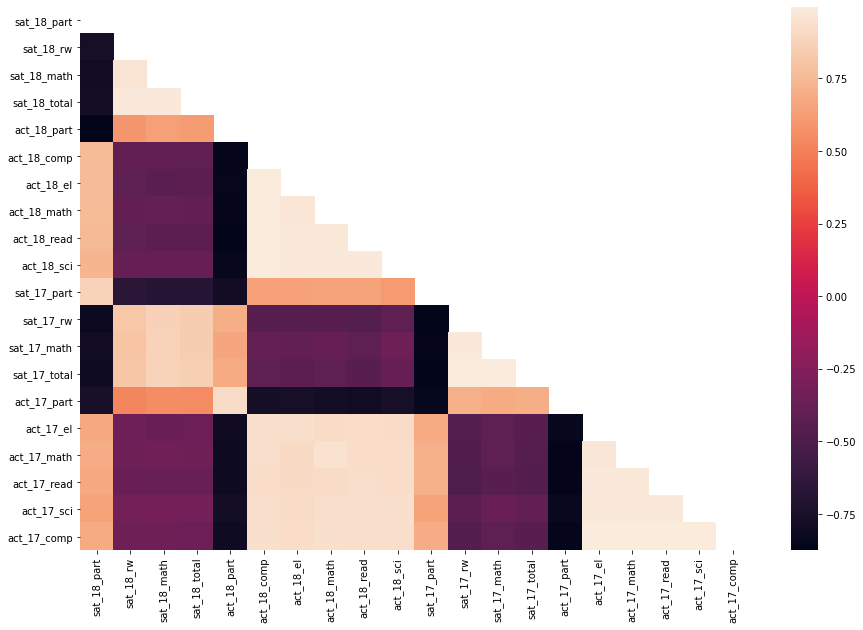

In [92]:
custom_mask = np.zeros_like(finaldata.corr())   # To replicate the (i,j) matrix of boston_df.corr() with a matrix of all 0. (0,0) matrix
custom_mask[np.triu_indices_from(custom_mask)] = True  # 

plt.figure(figsize=(15,10))
sns.heatmap(finaldata.corr(),mask = custom_mask);

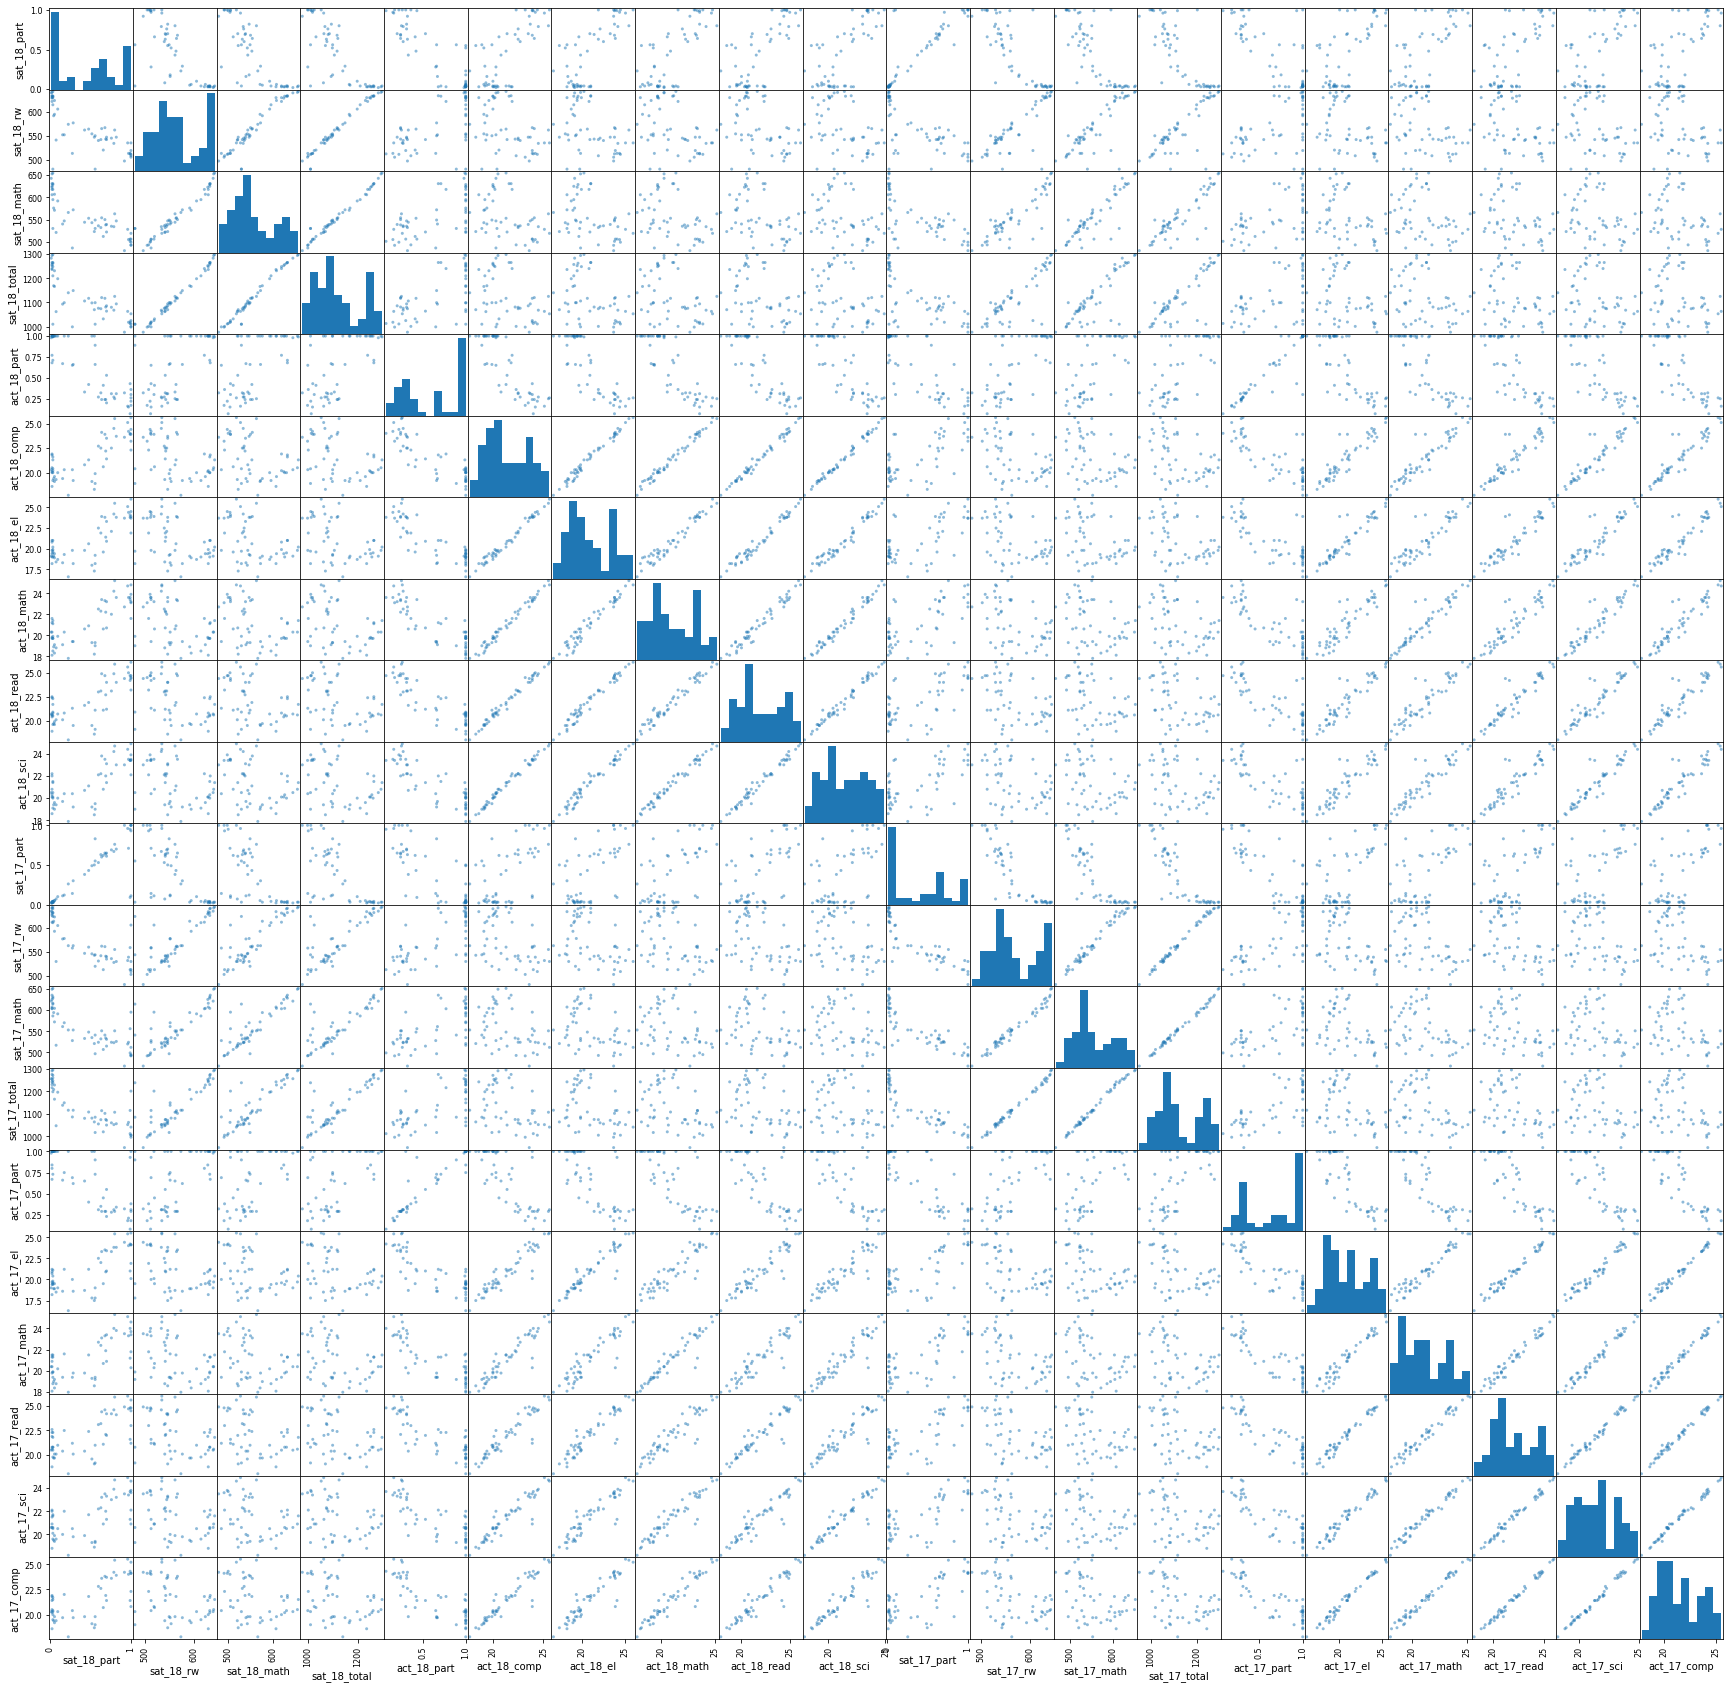

In [93]:
pd.plotting.scatter_matrix(finaldata, figsize=(30, 30));

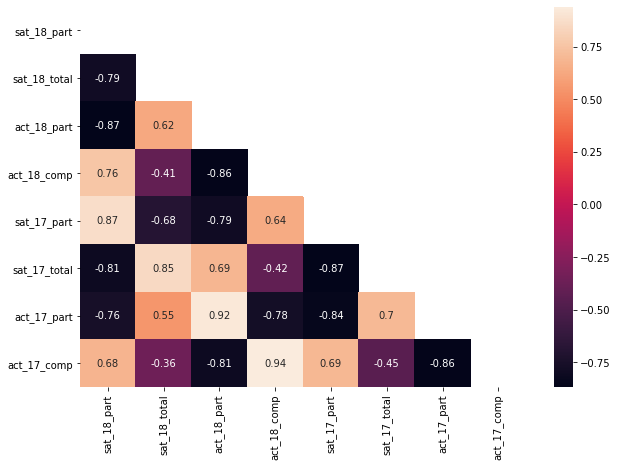

In [94]:
# Zooming into some datasets, dropping subject test scores.

custom_mask = np.zeros_like(heatmapdata.corr())   # To replicate the (i,j) matrix of boston_df.corr() with a matrix of all 0. (0,0) matrix
custom_mask[np.triu_indices_from(custom_mask)] = True  # 

plt.figure(figsize=(10,7))
sns.heatmap(heatmapdata.corr(),annot=True,mask = custom_mask);

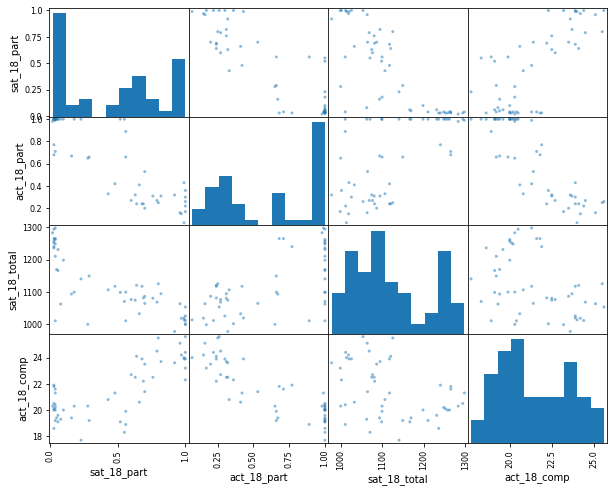

In [95]:
pd.plotting.scatter_matrix(scattermatrixdata, figsize=(10, 8));

##### Initial analysis through correlation heatmaps and scatterplots
**From scatter matrix:**
- There are many pairs of items with strong relationship (mostly positive) observed by the distinct upward sloping linear lines in each scatterplots. These pairs are generally intuitively correlated: 
    - Test participation rates across both years are positively correlated
    - Test scores across both years are positively correlated
    - SAT Average Total scores and SAT test subjects are positively correlated
    - ACT Composite scores and ACT test subjects are positively correlated
    - Both SAT and ACT individual subject scores are positively correlated with each other. 
- Some negative correlated pairs that were observed are generally:
    - SAT Participation vs. SAT subject and total scores are negatively correlated with each other. (Curved relationship, mentioned below)
    - ACT Participation vs. ACT subject and compositve scores are negatively correlated with each other.
- There seems to be a slight curved relationship to these pairs:
    - SAT Participation vs. SAT subject and total scores are negatively correlated with each other.
        - *This insinuates that test scores increases at a higher rate as participation decreases.*
        - The above relationship is not as distinct for the ACT test. 

**From correlation heatmap:**
- Both SAT/ACT Scores are highly negatively correlated to SAT/ACT Participation
    - *The higher the participation for both tests, the lower the test scores.*
- SAT Scores are negatively correlated to ACT Scores 
    - *States with high SAT scores generally have lower ACT scores, vice versa*   #Interesting
- Test scores in 2018 are positively correlated to test scores in 2017
    - *Average Test scores (for both exams) for each states does not vary much across the years.*
- Participation for both exams across 2017 and 2018 are positively correlated. However, ACT has a larger positive relationship than SAT.
    - *States that has high participation in either SAT or ACT exam in 2017 tend to have high participation in the same exam for 2018*
- SAT Participation is highly negatively correlated to ACT Participation
    - *The higher the participation for both tests, the lower the test scores.*
    
**From scatter matrix with only 2018 scores and participation across both tests**
- There are many more states having near 100% participation in ACT than SAT. For the SAT test, distinctly more states have near 0% participation. 
- Generally, SAT scores tend to have much higher dispersion (ie. standard deviation) than ACT scores. 
- States with high SAT participation tend to have higher ACT scores. However, the inverse is not as distinct. #interesting
- Although heatmap showed a negative correlation between SAT and ACT scores, scatterplots showed that the relationship is not as distinct (ie. there is a huge dispersion of data). 

#### Define a custom function to subplot histograms
<details><summary>Instructions</summary>

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)
</details>

In [96]:
def subplot_histogram(dataframe,list_of_columns, list_of_titles,suptitle,datafigsize):
    fig, ax = plt.subplots(2, 2,figsize=(15,10)) 
    fig.suptitle(suptitle,fontsize=20)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])

In [97]:
def subplot_boxplot(dataframe,list_of_columns, suptitle, list_of_titles,datafigsize):
    fig, ax = plt.subplots(2, 2,figsize=(15,10)) 
    fig.suptitle(suptitle,fontsize=20)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].boxplot(dataframe[column],showmeans=True) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].xaxis.set_visible(False)

#### Plot and interpret histograms 
<details>
<summary>Instructions</summary>
    
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT                  
    - Assuming ACT Reading section is equivalent to Evidence-based Reading/Writing in SAT.
</details>

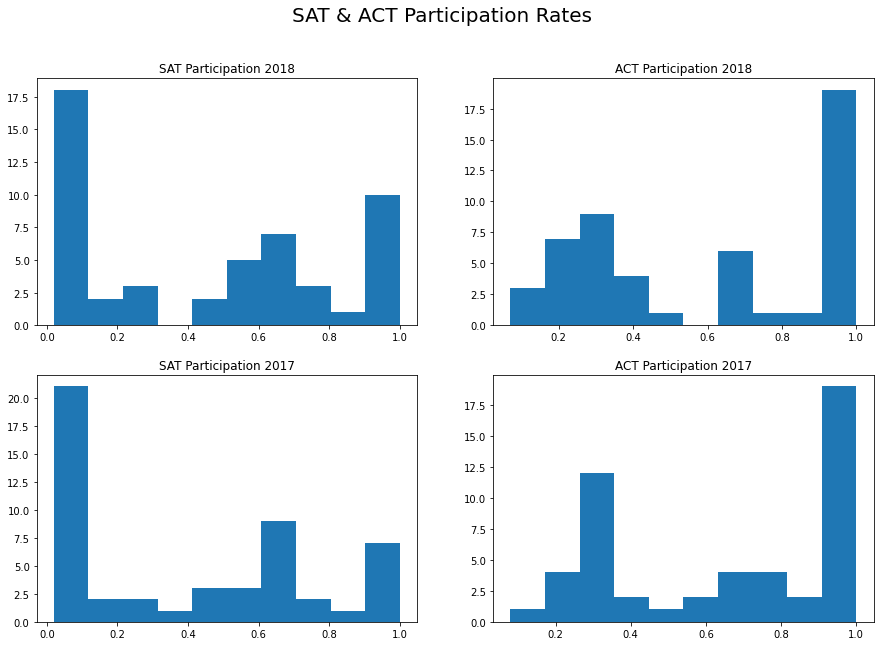

In [121]:
subplot_histogram(finaldata,
                  ['sat_18_part','act_18_part','sat_17_part','act_17_part']
                  ,["SAT Participation 2018","ACT Participation 2018","SAT Participation 2017","ACT Participation 2017"]
                  ,"SAT & ACT Participation Rates",
                  (15,5))

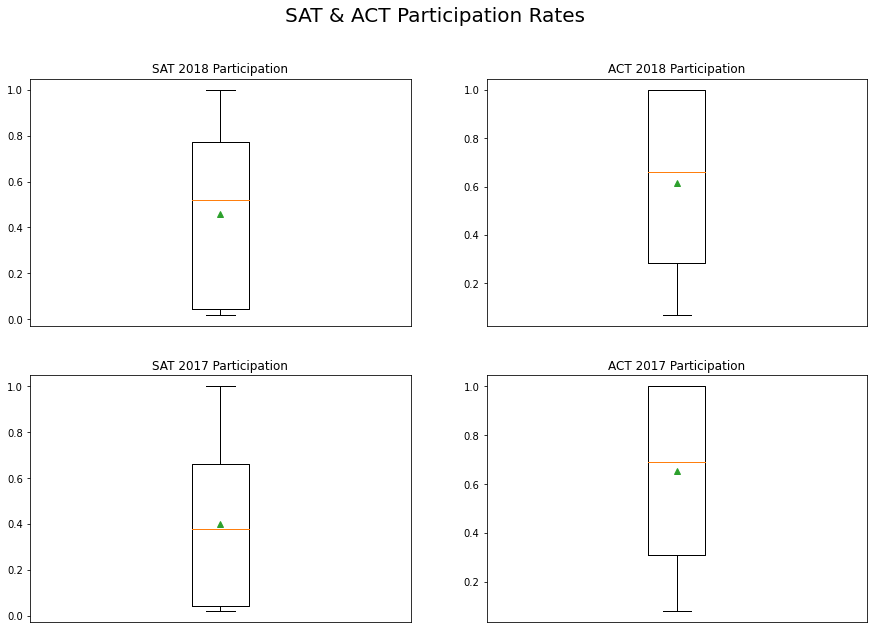

In [99]:
subplot_boxplot(finaldata,
                ['sat_18_part','act_18_part','sat_17_part','act_17_part'],
                "SAT & ACT Participation Rates",["SAT 2018 Participation","ACT 2018 Participation",
                                                 "SAT 2017 Participation","ACT 2017 Participation"],
                (15,10))

In [100]:
print(f"SAT 2018 Participation: \n25th and 75th percentile: {round(np.percentile(finaldata['sat_18_part'], 25),2),round(np.percentile(finaldata['sat_18_part'], 75),2)}\n")
print(f"ACT 2018 Participation: \n25th and 75th percentile: {round(np.percentile(finaldata['act_18_part'], 25),2),round(np.percentile(finaldata['act_18_part'], 75),2)}")

SAT 2018 Participation: 
25th and 75th percentile: (0.04, 0.78)

ACT 2018 Participation: 
25th and 75th percentile: (0.29, 1.0)


##### Histogram and Boxplot analysis
**SAT & ACT Participation**
- SAT Histogram: Histogram shows a general "U" shape. This suggests that participation across states are either extremely high or extremely low.
    - Histogram shows that despite the huge disparity, there are more states that lean towards having near 0% participation.
- SAT Boxplot: From boxplot analysis, the distance between 25th percentile and lower whisker is really narrow. Hence, this indicates that the almost 25% of all states fall between the minimum to 25th percentile participation rate (which is near 0%).
- ACT Histogram: There are a significant number of states that have near 100 participation rate. However, for states that do not have near 100% participation rate, most of them fall below 50% participation. 
- ACT Boxplot: There are no upper whisker present for the ACT exam, indicating that the top 25% states (75th to 100th percentile) all fall within the 100% participation rate. 
- **Cross Comparison:**
    - Median participation rate for ACT is slightly above SAT for 2018; disparity of median between ACT and SAT is higher in 2017.
    - Both 2017 and 2018 participation across SAT and ACT exams reflect similar patterns. However, as mean participation for SAT 2017 is higher than median, this shows that there are more states having higher participation rates in 2017 than 2018.

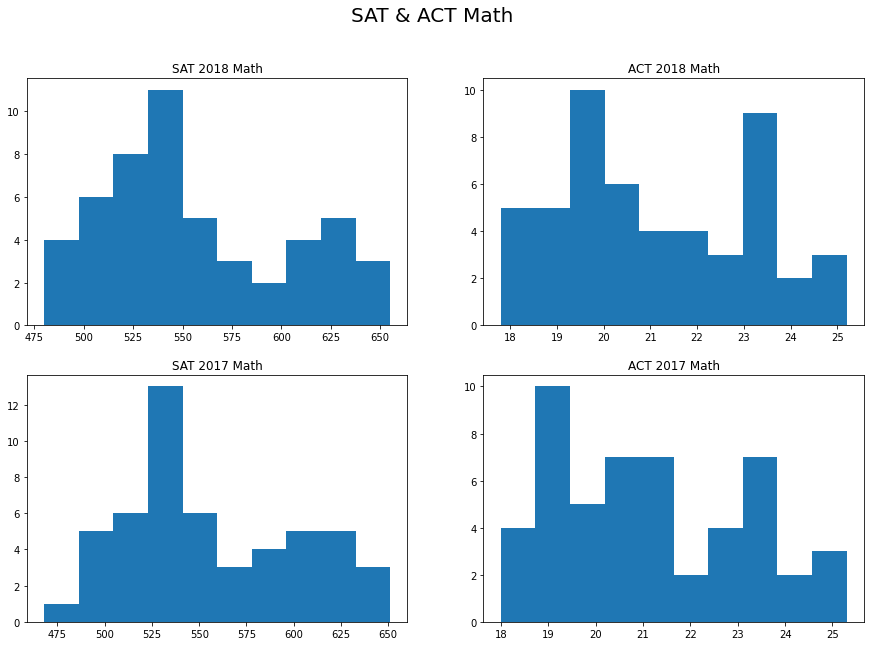

In [101]:
# Math scores for SAT & ACT

subplot_histogram(finaldata,
                  ['sat_18_math','act_18_math','sat_17_math','act_17_math']
                  ,["SAT 2018 Math","ACT 2018 Math","SAT 2017 Math","ACT 2017 Math"]
                  ,"SAT & ACT Math",
                  (15,5))

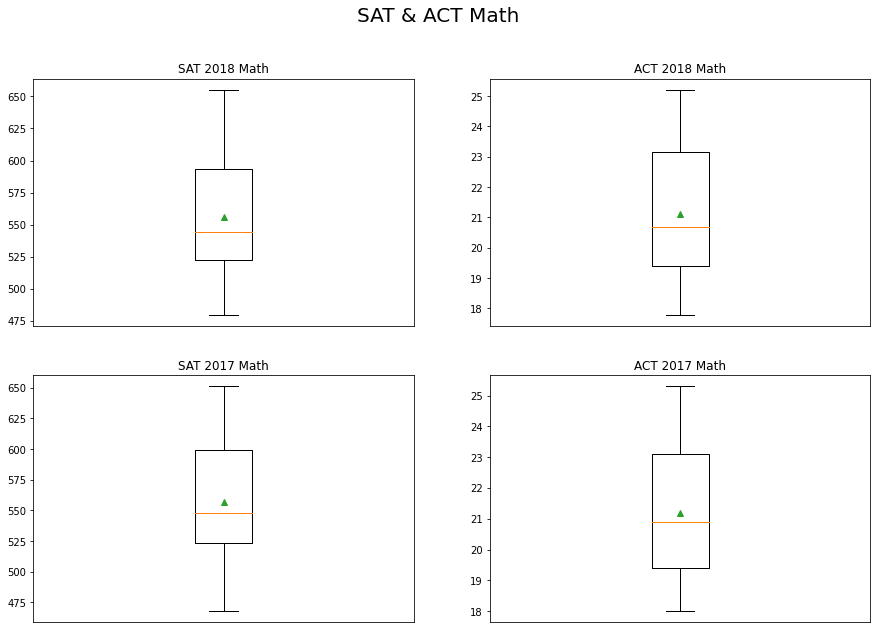

In [102]:
subplot_boxplot(finaldata,
                ['sat_18_math','act_18_math','sat_17_math','act_17_math'],
                "SAT & ACT Math",["SAT 2018 Math","ACT 2018 Math",
                                                 "SAT 2017 Math","ACT 2017 Math"],
                (15,10))

##### Histogram and Boxplot analysis
**SAT & ACT Math**
- **Cross Comparison:**
    - Across both exams and both years, boxplots showed that the mean is above median, and the distance between median and upper whisker is large. This indicates that test takers in top 50% percentile has a large disparity of scores. 
    Test scores are slightly more uniform for ACT than SAT. 

In [103]:
print(f"SAT 2018 Participation: \n25th and 75th percentile: {round(np.percentile(finaldata['sat_18_math'], 25),2),round(np.percentile(finaldata['sat_18_math'], 75),2)}\n")
print(f"ACT 2018 Participation: \n25th and 75th percentile: {round(np.percentile(finaldata['act_18_math'], 25),2),round(np.percentile(finaldata['act_18_math'], 75),2)}")

SAT 2018 Participation: 
25th and 75th percentile: (522.5, 593.5)

ACT 2018 Participation: 
25th and 75th percentile: (19.4, 23.15)


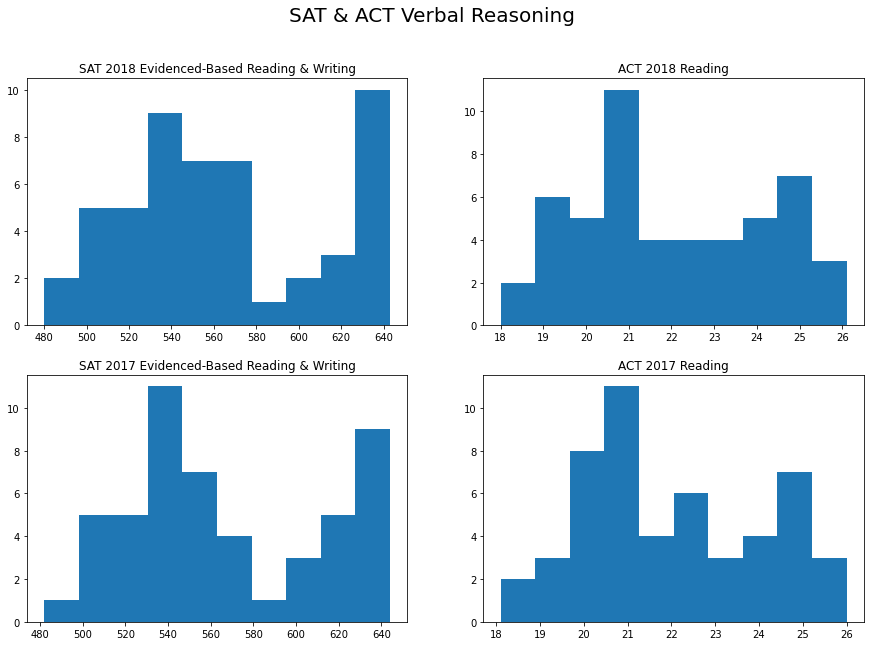

In [104]:
# Reading/Verbal Scores for both SAT & ACT

subplot_histogram(finaldata,
                  ['sat_18_rw','act_18_read','sat_17_rw','act_17_read']
                  ,["SAT 2018 Evidenced-Based Reading & Writing","ACT 2018 Reading",
                    "SAT 2017 Evidenced-Based Reading & Writing","ACT 2017 Reading"]
                  ,"SAT & ACT Verbal Reasoning",
                  (15,5))

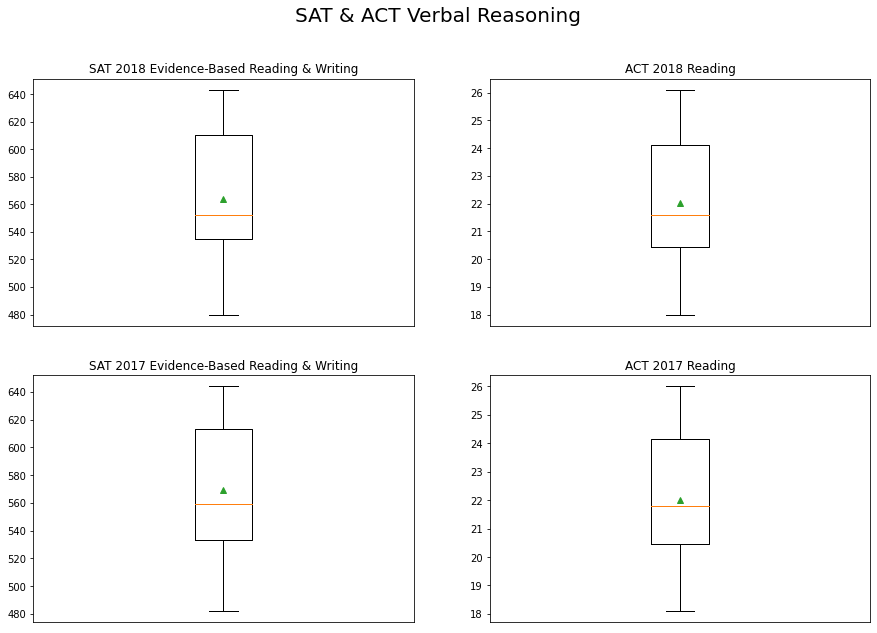

In [105]:
subplot_boxplot(finaldata,
                ['sat_18_rw','act_18_read','sat_17_rw','act_17_read'],
                "SAT & ACT Verbal Reasoning",["SAT 2018 Evidence-Based Reading & Writing","ACT 2018 Reading",
                                                 "SAT 2017 Evidence-Based Reading & Writing","ACT 2017 Reading"],
                (15,10))

In [106]:
print(f"SAT 2018 Participation: \n25th and 75th percentile: {round(np.percentile(finaldata['sat_18_rw'], 25),2),round(np.percentile(finaldata['sat_18_rw'], 75),2)}\n")
print(f"ACT 2018 Participation: \n25th and 75th percentile: {round(np.percentile(finaldata['act_18_read'], 25),2),round(np.percentile(finaldata['act_18_read'], 75),2)}")

SAT 2018 Participation: 
25th and 75th percentile: (534.5, 610.5)

ACT 2018 Participation: 
25th and 75th percentile: (20.45, 24.1)


##### Histogram and Boxplot analysis
**SAT & ACT Verbal Reasoning**
- **Cross Comparison:**
    - Many states performed exceptionally well for the SAT exam, with high number of states placed in the top histogram bucket. This is not as evident for the ACT exam.
    - Boxplots showed that all 4 plots have a mean higher than the median, which indicates that states that performed above 50th percentile have a huge disparity of scores.

#### Plot and interpret scatter plots
<details><summary>Instructions</summary>
For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.
</details>

2017 Correlation = -0.42
2018 Correlation = -0.38


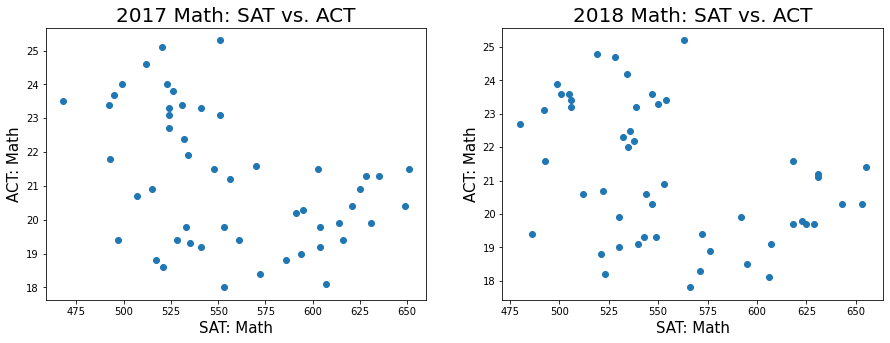

In [107]:
fig,axs = plt.subplots(1, 2,figsize=(15,5))
axs[0].scatter(finaldata['sat_17_math'],
            finaldata['act_17_math'])
axs[0].set_title("2017 Math: SAT vs. ACT", fontsize=20)
axs[0].set_xlabel("SAT: Math", fontsize = 15)
axs[0].set_ylabel("ACT: Math", fontsize = 15);

axs[1].scatter(finaldata['sat_18_math'],
            finaldata['act_18_math'])
axs[1].set_title("2018 Math: SAT vs. ACT", fontsize=20)
axs[1].set_xlabel("SAT: Math", fontsize = 15)
axs[1].set_ylabel("ACT: Math", fontsize = 15)

math17cor=round(finaldata['sat_17_math'].corr(finaldata['act_17_math']),2)
math18cor=round(finaldata['sat_18_math'].corr(finaldata['act_18_math']),2)

print(f"2017 Correlation = {math17cor}\n2018 Correlation = {math18cor}");

2017 Correlation = -0.49
2018 Correlation = -0.42


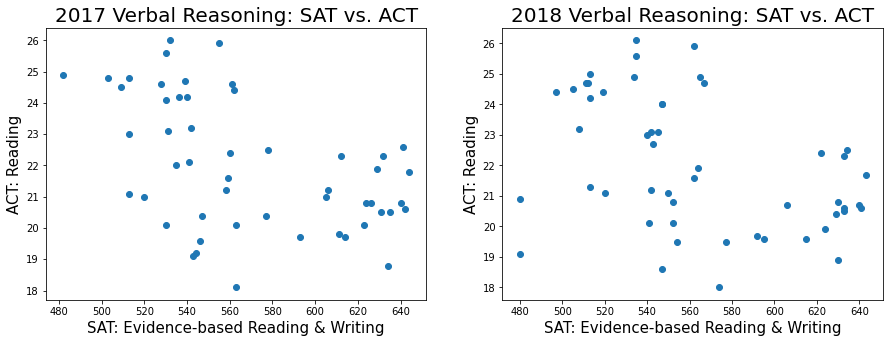

In [108]:
fig,axs = plt.subplots(1, 2,figsize=(15,5))
axs[0].scatter(finaldata['sat_17_rw'],
            finaldata['act_17_read'])
axs[0].set_title("2017 Verbal Reasoning: SAT vs. ACT", fontsize=20)
axs[0].set_xlabel("SAT: Evidence-based Reading & Writing", fontsize = 15)
axs[0].set_ylabel("ACT: Reading", fontsize = 15);

axs[1].scatter(finaldata['sat_18_rw'],
            finaldata['act_18_read'])
axs[1].set_title("2018 Verbal Reasoning: SAT vs. ACT", fontsize=20)
axs[1].set_xlabel("SAT: Evidence-based Reading & Writing", fontsize = 15)
axs[1].set_ylabel("ACT: Reading", fontsize = 15)

read17cor=round(finaldata['sat_17_rw'].corr(finaldata['act_17_read']),2)
read18cor=round(finaldata['sat_18_rw'].corr(finaldata['act_18_read']),2)

print(f"2017 Correlation = {read17cor}\n2018 Correlation = {read18cor}");

2017 Correlation = -0.45
2018 Correlation = -0.41


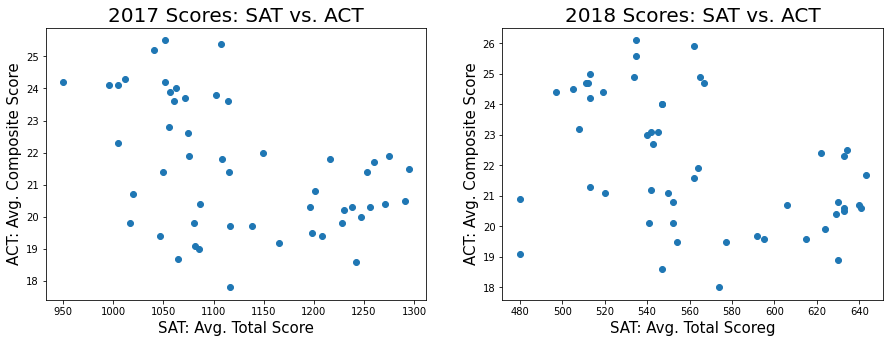

In [109]:
fig,axs = plt.subplots(1, 2,figsize=(15,5))
axs[0].scatter(finaldata['sat_17_total'],
            finaldata['act_17_comp'])
axs[0].set_title("2017 Scores: SAT vs. ACT", fontsize=20)
axs[0].set_xlabel("SAT: Avg. Total Score", fontsize = 15)
axs[0].set_ylabel("ACT: Avg. Composite Score", fontsize = 15);

axs[1].scatter(finaldata['sat_18_rw'],
            finaldata['act_18_read'])
axs[1].set_title("2018 Scores: SAT vs. ACT", fontsize=20)
axs[1].set_xlabel("SAT: Avg. Total Scoreg", fontsize = 15)
axs[1].set_ylabel("ACT: Avg. Composite Score", fontsize = 15)

total17cor=round(finaldata['sat_17_total'].corr(finaldata['act_17_comp']),2)
total18cor=round(finaldata['sat_18_total'].corr(finaldata['act_18_comp']),2)

print(f"2017 Correlation = {total17cor}\n2018 Correlation = {total18cor}");

SAT Correlation = 0.85
ACT Correlation = 0.94


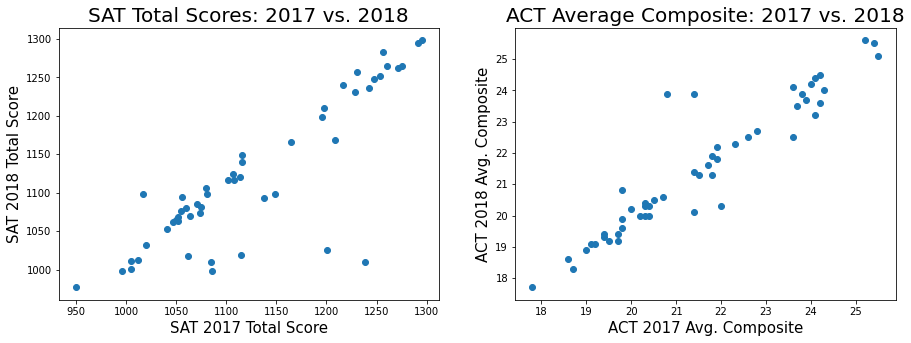

In [110]:
fig,axs = plt.subplots(1, 2,figsize=(15,5))
axs[0].scatter(finaldata['sat_17_total'],
            finaldata['sat_18_total'])
axs[0].set_title("SAT Total Scores: 2017 vs. 2018", fontsize=20)
axs[0].set_xlabel("SAT 2017 Total Score", fontsize = 15)
axs[0].set_ylabel("SAT 2018 Total Score", fontsize = 15);

axs[1].scatter(finaldata['act_17_comp'],
            finaldata['act_18_comp'])
axs[1].set_title("ACT Average Composite: 2017 vs. 2018", fontsize=20)
axs[1].set_xlabel("ACT 2017 Avg. Composite", fontsize = 15)
axs[1].set_ylabel("ACT 2018 Avg. Composite", fontsize = 15)

satcor=round(finaldata['sat_18_total'].corr(finaldata['sat_17_total']),2)
actcor=round(finaldata['act_18_comp'].corr(finaldata['act_17_comp']),2)

print(f"SAT Correlation = {satcor}\nACT Correlation = {actcor}");

##### Scatterplot Analysis
- For overall test scores, Math and Verbal Reasoning, there is a moderate negative correlation between states' scores for SAT and ACT. The correlation coefficient stands at approximately -0.3 to -0.5.
    - This suggests that states that perform well in one test (ie. SAT) does not perform as well for the other test (ie. ACT). This is consistent across overall scores and overlapping subjects.
- However, both SAT and ACT has a strong positive correlation between 2017 and 2018 test scores. Correlation coefficient stands at 0.85 for SAT and 0.94 for ACT.

#### Plot and interpret boxplots
<details><summary>Instructions</summary>
For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels
</details>

In [111]:
# Subject Scores SAT
data_satsubject=finaldata[['sat_18_rw', 'sat_18_math','sat_17_rw', 'sat_17_math']]
# Subject Scores ACT
data_actsubject=finaldata[['act_18_el', 'act_18_math', 'act_18_read',
       'act_18_sci','act_17_el', 'act_17_math', 'act_17_read', 'act_17_sci']]
# Total Scores
data_sattotal=finaldata[['sat_18_total', 'sat_17_total']]
data_acttotal=finaldata[['act_18_comp', 'act_17_comp']]
# Participation
data_part=finaldata[['sat_18_part','sat_17_part','act_18_part','act_17_part']]

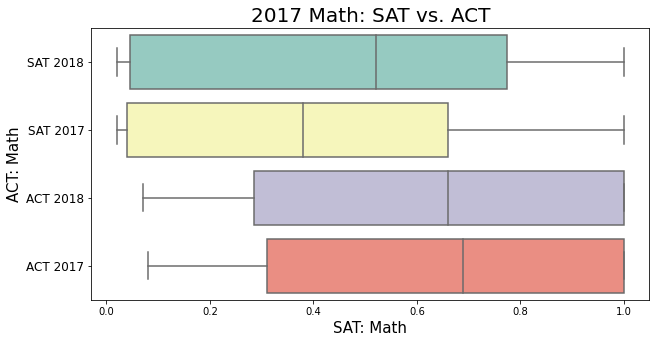

In [112]:
plt.figure(figsize=(10,5))
plt.title("2017 Math: SAT vs. ACT", fontsize=20)
plt.xlabel("SAT: Math", fontsize = 15)
plt.ylabel("ACT: Math", fontsize = 15);
sns.boxplot(data=data_part,orient='h',palette="Set3")
plt.yticks([0,1,2,3],(["SAT 2018","SAT 2017","ACT 2018","ACT 2017"]),fontsize=12);

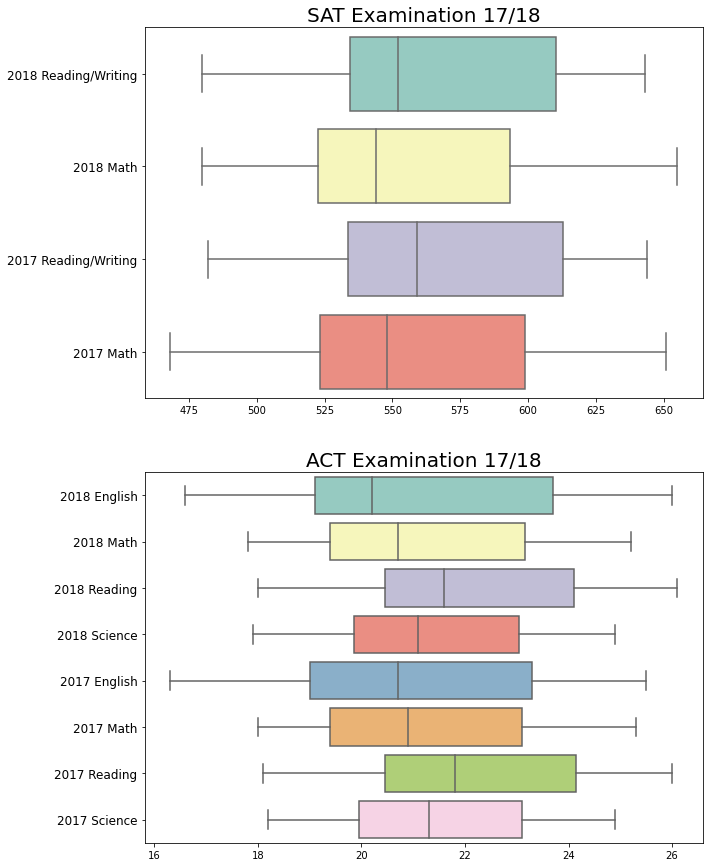

In [113]:
f, axes = plt.subplots(2, 1, figsize=(10,15))

sns.boxplot(data = data_satsubject, orient='h',palette = 'Set3',ax=axes[0])
sns.boxplot(data = data_actsubject, orient='h',palette = 'Set3',ax=axes[1]);

axes[0].set_yticklabels(["2018 Reading/Writing","2018 Math",
                         "2017 Reading/Writing","2017 Math"], 
                        fontsize=12)
axes[1].set_yticklabels(["2018 English","2018 Math",
                         "2018 Reading","2018 Science",
                         "2017 English","2017 Math",
                         "2017 Reading","2017 Science"], 
                        fontsize=12)
axes[0].set_title("SAT Examination 17/18",fontsize=20)
axes[1].set_title("ACT Examination 17/18",fontsize=20);

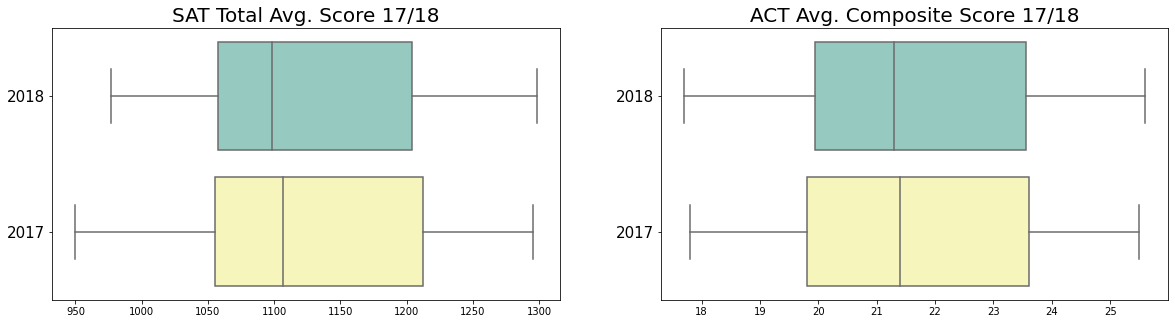

In [114]:
f, axes = plt.subplots(1, 2, figsize=(20,5))

sns.boxplot(data = data_sattotal, orient='h',palette = 'Set3',ax=axes[0])
sns.boxplot(data = data_acttotal, orient='h',palette = 'Set3',ax=axes[1])

axes[0].set_yticklabels(["2018",
                         "2017"], 
                        fontsize=15)
axes[1].set_yticklabels(["2018","2017"], 
                        fontsize=15)

axes[0].set_title("SAT Total Avg. Score 17/18",fontsize=20)
axes[1].set_title("ACT Avg. Composite Score 17/18",fontsize=20);

##### Boxplot Analysis
*As I have previously analysed the boxplots (click here), I will be including key findings in this section only*
- Across all boxplots, there are no outliers. All datapoints fall within the upper and lower whiskers of boxplots. 
- ACT participation clearly outbeat SAT participation, suggesting that the SAT board should step up on their efforts to increase SAT take-up rate. 
- States that performed well in the SAT Math and Reading/Writing, tends to perform exceptionally well as shown by the huge test score disparity between median, upper quartile and upper whisker. 
- States that performed well in the ACT English, tends to perform exceptionally well as shown by the huge test score disparity between median, upper quartile and upper whisker. 
- There is a larger disparity in the SAT test scores amongst states in the upper median, than ACT test. This suggests that states that performed well, performed exceptionally well for SAT. It might be harder to differentiate yourself through the ACT exam.  

<details><summary>Instructions</summary>
Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.</details>



<details><summary>Instructions</summary>
(Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 
Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.</details>

### SAT Participation 2018
![my_image](pics/sat-18-part.png)

### ACT Participation 2018
![my_image](pics/act-18-part.png)

### SAT Total Average Scores 2018
![my_image](pics/sat-18-total.png)

### ACT Average Composite Scores 2018
![my_image](pics/act-18-comp.png)

### SAT Math Scores 2018
![my_image](pics/sat-18-math.png)

### SAT Reading Scores 2018
![my_image](pics/sat-18-read.png)

### ACT Math Scores 2018
![my_image](pics/act-18-math.png)

### ACT Reading Scores 2018
![my_image](pics/act-18-read.png)


## Descriptive and Inferential Statistics

#### Summarizing Distributions
<details>
<summary>Instructions</summary>
Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.
    </details>

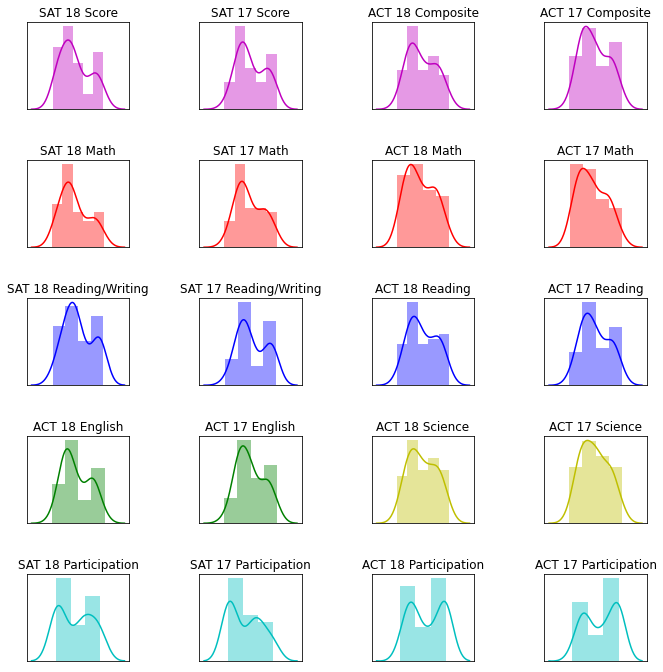

In [115]:
f, axes = plt.subplots(5, 4, figsize=(10, 10))
f.tight_layout(pad=3.0)

sns.distplot(finaldata['sat_18_total'], color="m", ax=axes[0, 0])
sns.distplot(finaldata['sat_17_total'], color="m", ax=axes[0, 1])
sns.distplot(finaldata['act_18_comp'], color="m", ax=axes[0, 2])
sns.distplot(finaldata['act_17_comp'], color="m", ax=axes[0, 3])

axes[0,0].set_title("SAT 18 Score")
axes[0,1].set_title("SAT 17 Score")
axes[0,2].set_title("ACT 18 Composite")
axes[0,3].set_title("ACT 17 Composite")
#-----------------------------------------------------------------------------------------#
sns.distplot(finaldata['sat_18_math'], color="r", ax=axes[1, 0])
sns.distplot(finaldata['sat_17_math'], color="r", ax=axes[1, 1])
sns.distplot(finaldata['act_18_math'], color="r", ax=axes[1, 2])
sns.distplot(finaldata['act_17_math'], color="r", ax=axes[1, 3])

axes[1,0].set_title("SAT 18 Math")
axes[1,1].set_title("SAT 17 Math")
axes[1,2].set_title("ACT 18 Math")
axes[1,3].set_title("ACT 17 Math")

#-----------------------------------------------------------------------------------------#
sns.distplot(finaldata['sat_18_rw'], color="b", ax=axes[2, 0])
sns.distplot(finaldata['sat_17_rw'], color="b", ax=axes[2, 1])
sns.distplot(finaldata['act_18_read'], color="b", ax=axes[2, 2])
sns.distplot(finaldata['act_17_read'], color="b", ax=axes[2, 3])

axes[2,0].set_title("SAT 18 Reading/Writing")
axes[2,1].set_title("SAT 17 Reading/Writing")
axes[2,2].set_title("ACT 18 Reading")
axes[2,3].set_title("ACT 17 Reading")

#-----------------------------------------------------------------------------------------#
sns.distplot(finaldata['act_18_el'], color="g", ax=axes[3, 0])
sns.distplot(finaldata['act_17_el'], color="g", ax=axes[3, 1])
sns.distplot(finaldata['act_18_sci'], color="y", ax=axes[3, 2])
sns.distplot(finaldata['act_17_sci'], color="y", ax=axes[3, 3])

axes[3,0].set_title("ACT 18 English")
axes[3,1].set_title("ACT 17 English")
axes[3,2].set_title("ACT 18 Science")
axes[3,3].set_title("ACT 17 Science")

#-----------------------------------------------------------------------------------------#
sns.distplot(finaldata['sat_18_part'], color="c", ax=axes[4, 0])
sns.distplot(finaldata['sat_17_part'], color="c", ax=axes[4, 1])
sns.distplot(finaldata['act_18_part'], color="c", ax=axes[4, 2])
sns.distplot(finaldata['act_17_part'], color="c", ax=axes[4, 3])

axes[4,0].set_title("SAT 18 Participation")
axes[4,1].set_title("SAT 17 Participation")
axes[4,2].set_title("ACT 18 Participation")
axes[4,3].set_title("ACT 17 Participation")

#-----------------------------------------------------------------------------------------#

for i in range(5):
    for j in range(4):
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False);

In [116]:
print("Below are the statistical output for each distribution: p-value for normality, skewness and  kurtosis\n")
for col in finaldata.columns[1:]:
    stat, p = stats.normaltest(finaldata[col])
    skew = round(finaldata[col].skew(),2)
    kurtosis = round(finaldata[col].kurtosis(),2)
    
    if p> 0.05:
        print(f'{col}: p value = {round((p),3)} - Distribution is approximately normal at 5% significance \nSkew:{skew};  kurtosis:{kurtosis}\n')
    else: 
        print(f'{col}: p value = {round((p),3)} - Distribution is not normal \nSkew:{skew};  kurtosis:{kurtosis}\n')

Below are the statistical output for each distribution: p-value for normality, skewness and  kurtosis

sat_18_part: p value = 0.0 - Distribution is not normal 
Skew:0.14;  kurtosis:-1.57

sat_18_rw: p value = 0.018 - Distribution is not normal 
Skew:0.28;  kurtosis:-1.06

sat_18_math: p value = 0.089 - Distribution is approximately normal at 5% significance 
Skew:0.53;  kurtosis:-0.76

sat_18_total: p value = 0.015 - Distribution is not normal 
Skew:0.47;  kurtosis:-1.02

act_18_part: p value = 0.0 - Distribution is not normal 
Skew:-0.02;  kurtosis:-1.74

act_18_comp: p value = 0.013 - Distribution is not normal 
Skew:0.28;  kurtosis:-1.08

act_18_el: p value = 0.011 - Distribution is not normal 
Skew:0.37;  kurtosis:-1.07

act_18_math: p value = 0.009 - Distribution is not normal 
Skew:0.27;  kurtosis:-1.11

act_18_read: p value = 0.009 - Distribution is not normal 
Skew:0.2;  kurtosis:-1.12

act_18_sci: p value = 0.011 - Distribution is not normal 
Skew:0.17;  kurtosis:-1.11

sat_17

#### Further Analysis of distributions across all variables (click to view)
<details><summary> Pink: SAT/ACT Scores</summary>
    
    1. SAT: SAT scores observed a bi-modal shaped distribution. 
    
    2. ACT: The ACT composite distribution observed less of a bi-modal distribution than the SAT distribution. 
    
</details>

<details><summary> Red: SAT/ACT Math</summary>
    
    1. SAT: SAT math scores observed a slight bi-modality in the shape of its distributions. 
   
    2. ACT: The ACT math distribution observed less of a bi-modal distribution than the SAT distribution. 
        - This is further supported by the statistical output shown above, suggesting that the ACT math distributions tend to lean towards a normal distribution. 
    
</details>

<details><summary> Purple: SAT/ACT Reading</summary>
    
    1. SAT: The distributions distinctly follows a bi-modal shape with two peaks. 
   
    2. ACT: Although less distinct than the SAT distributions, the ACT distributions also follow a slight bi-modal shape. 
</details>

<details><summary> Green: ACT English</summary>
     
    1. ACT: The 2018 distributions are more distinctly bi-modal than the 2017 distributions. 
    2. Statistical output shown above suggests that 2017 scores leans towards a normal distribution. 
</details>

<details><summary> Yellow: ACT Science</summary>
        
    1. ACT: Out of all the distributions shown above, distributions for 2017 ACT science seems the MOST normal with a left skew.
        - This is further supported by the statistical output above, where p-value is greater than 5%, suggesting that it leans towards a normal distribution. 

</details>

<details><summary> Cyan: SAT/ACT Participation</summary>
    
    1. SAT: There are distinct bi-modal shape across the distributions.
    2. ACT: There are distinct bi-modal shape across the distributions. The ACT Participation is the only distribution that has a negative skew. This essentially means that more states have a high participation rate than having a low participation rate. 
</details>


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assume that data we sample from a population will be normally distributed. Do we observe this trend?***

**Answer:**
We do not observe a typical normal distribution across any of our frequency distribution as shown above, contrary to what the Central Limit Theorem (CLT) predicts. The CLT does not hold in this experiment because of the following reasons:<br>

1) We do not know the distribution of the underlying data for each state. This means that if the underlying data is non-normal, then **51 samples may be too small a number for CLT to set effect**. This is because strongly skewed distributions requires larger sample sizes (>30). 

2) For central limit theorem to hold, samples taken from the population **must be RANDOM**. However, the samples in this case are definitely not randomised as underlying factors for each states would heavily affect test scores and participation. These could include demographic, state policies, quality of schools etc. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:**

For ALL test scores (total scores and subject scores), ACT distributions tend to lean more towards a normal distribution than SAT distributions. A possible interpretation for this finding is because there are a larger number of states that have mandatory participation for the ACT than SAT examination. As only the test takers' scores would be captured in the distributions for total scores and subject scores, ACT examination does not have as much selection bias than SAT exam. Selection bias in this case means the self-selection bias, in which test takers who are 'better' and 'smarter' would choose to take the exam, skewing the underlying result. 

**Overall conviction:** CLT does not hold for any of the distributions for Math, Reading and Rates. The overarching reason is because none of the distribution seem normal, with significant skew and kurtosis. Moreover, samples are not randomised, which violates one key assumption for the CLT.

Math
- The shape of the distribution for Math across SAT and ACT leans more towards a normal distribution than Reading / Participation rates. 
- ACT distribution leans more towards a normal distribution than SAT distribution, as mentioned above. 
- However, CLT will still not hold.


Reading
- For the SAT reading tests, we observe a slight bi-modal distribution to it. Hence, as distribution does not seem normal, CLT does not hold for this. 

Participation
- Participation is the least normal distribution out of the three described. CLT does not hold.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:**
No. It does not make sense to perform statistical tests from our dataset. 
1. The main reason is because none of the samples are randomised, hence Central Limit Theorem will not hold across all distributions that we have. 
2. Moreover, number of samples are not large enough to eliminate the non-normality of all distributions. As the underlying data are highly skewed, we would need to compensate it with having a larger number of samples. 
3. There is self-selection bias present heavily in the SAT examination than the ACT examination. This essentially means that only the students who are interested in taking the exam will take it. Hence, scores would likely be higher for states with higher self-selection bias. With more states having 100% mandatory participation in the ACT than SAT, this means that there will be higher self-selection bias in the SAT, which further causes the samples to be bias. 
4. Based on common understanding, the sample size size for each sample is not consistent. Essentially, this is because each state has different number of college students. With a different sample size, this would further limit the Central Limit Theorem assumption. 

The best way for us to perform statistical test on this subject matter, is to obtain a dataset of ALL college students, with their decision to participate in SAT/ACT and their test scores in both tests. Then, we can create randomised samples with equal number of students in each sample, and perform statical inferences.

However, with our current dataset, one way to perform a statistical test (albeit still highly inaccurate) is for us to drop states that have less than 95% participation in either SAT and ACT exam. With the data we are left with, samples are more randomised than before. However, we will not be able to obtain an approximate normal distribution based on CLT despite our efforts, as our samples are still highly unrandomised. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

**Answer:** It is not appropriate to compare and come to a statistical conclusion in this regard. This is because to perform a statistical test, we need to have an approximately normal distribution (hence to estimate true mean of ACT/SAT math scores to compare both). It is not possible without statistical tests to firmly conclude that the SAT exam is in any way 'harder' than the ACT exam, vice versa.

## Outside Research

<details><summary>Instructions</summary>Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).</details>

**State 1: Illinois**
- Illinois has seen a drastic increase in the SAT participation rates from 9% in 2017 to 99% in 2018. 
- External research concluded that Illinois has shifted from mandatory ACT participation to mandatory SAT participation for all Illinois high school students. 
- This is because College Board (which governs the SAT test) won a three-year, $14.3 million bid to provide SAT exam to all public high school juniors in Illinois.
- This came after the end of a 15-year contract that Illinois has with the ACT exam.
- Cost will be absorbed by the schools, and students can sit for the test on a weekday. This is in contrary to the traditional SAT exam where parents pay for the full cost of the exams, and exams to be taken on a weekend. 

Source: 
- [Testive](https://www.testive.com/illinois/)<br>
- [Chicagotribune](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)

In [117]:
illinois = finaldata[finaldata['state']=='Illinois']
pd.DataFrame(illinois, columns= ['state','sat_18_part','sat_17_part','act_18_part','act_17_part'])

,state,sat_18_part,sat_17_part,act_18_part,act_17_part
13,Illinois,0.99,0.09,0.43,0.93


**State 2: Colorado**

- Colorado has also seen a drastic increase in the SAT participation rates from 11% in 2017 to 100% in 2018. 
- External research concluded that Colorado has implemented a mandatory SAT testing for all Colorado high school juniors. 
- The SAT exams are replacing the ACT exams in Colorado (which was given to students since 2001) after a competitive bid on college-entrance exams. The decision was made because the selection committee believed that the SAT alighed better with high school Colorado Academic Standards. 
- Cost will be absorbed by the schools, and students can sit for the test on a weekday.

Source: 
- [Testive](https://www.testive.com/colorado-sat-change-2017/)<br>
- [DenverPost](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)

In [118]:
colorado = finaldata[finaldata['state']=='Colorado']
pd.DataFrame(colorado, columns= ['state','sat_18_part','sat_17_part','act_18_part','act_17_part'])

,state,sat_18_part,sat_17_part,act_18_part,act_17_part
5,Colorado,1.0,0.11,0.3,1.0


**State 3: Rhode Island**

- Colorado has also seen an increase in the SAT participation rates from 71% in 2017 to 97% in 2018. 
- External research concluded that Rhode Island has implemented that SAT / PSATs become a graduation requirement, as part of state'sd federal education plans.  
- Cost will be absorbed by the schools, and students can sit for the test on a weekday.

Source: 
- [Providence Journal](https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores)

In [119]:
rhode = finaldata[finaldata['state']=='Rhode Island']
pd.DataFrame(rhode, columns= ['state','sat_18_part','sat_17_part','act_18_part','act_17_part'])

,state,sat_18_part,sat_17_part,act_18_part,act_17_part
39,Rhode Island,0.97,0.71,0.15,0.21


## Conclusions and Recommendations

<details><summary>Instructions</summary>Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?</details>

In [120]:
# States with highest ACT scores but high participation
actscoresorted = pd.DataFrame(finaldata, columns= ['state','act_18_comp','sat_18_total','act_18_part','act_17_part','sat_18_part'])
actscoresorted.sort_values(by=['act_18_comp','sat_18_total','act_18_part'], inplace=True, ascending=False)
actscoresorted.head(25)

,state,act_18_comp,sat_18_total,act_18_part,act_17_part,sat_18_part
6,Connecticut,25.6,1053,0.26,0.31,1.00
21,Massachusetts,25.5,1125,0.25,0.29,0.80
29,New Hampshire,25.1,1063,0.16,0.18,0.96
32,New York,24.5,1068,0.27,0.31,0.79
22,Michigan,24.4,1011,0.22,0.29,1.00
39,Rhode Island,24.2,1018,0.15,0.21,0.97
45,Vermont,24.1,1120,0.24,0.29,0.64
19,Maine,24.0,1013,0.07,0.08,0.99
46,Virginia,23.9,1117,0.24,0.29,0.68
5,Colorado,23.9,1025,0.30,1.00,1.00


#### Conclusion
The above analysis clearly indicated a distinct rivalry between the SAT and ACT participation rates, with ACT clearly leading the race whilst SAT improving over the year with its participation rates. 

There are many states with mandatory ACT and SAT examinations. High participation rates in a particular test usually leads to low scores in the test, as well as low participation rates in the other test. 

The SAT is popular amongst coastal states, whilst the ACT is popular amongst non-coastal states. However, the SAT has been increasing its reach to inland/midwestern states after clinching the mandatory testing contract with Illinois and Illinois.

Based on the data above, the SAT examination tend to favour students who are exceptional, as shown by the large deviation of scores amongst the top students. This shows that the SAT examination might be slightly tougher than the ACT examination to score well. States with higher test scores in 2017 generally retains its high scores for 2018. 

#### Recommendations
**My recommendations are for us to look into focusing our efforts on states with:**

- No mandatory ACT testing (ie. no existing contractual agreement in place)
- Generally high ACT participation despite non-mandatory testing: This displays tenacity amongst students and a culture amongst high school students to pursue further education
- High ACT composite scores: This shows that the general competency of the students are high.
- High SAT average scores: Good track record in order to sell the idea to the state's education board. 
- Geographically clustered amongst the coastal states that favour the SAT exam. (Optional)


**With the above criterion in mind, I have narrowed my focus onto the state of South Dakota. Key reasons behind my recommendations are:**


1. There are no mandatory testing for either ACT or SAT in South Dakota. 
   - As we observed, mandatory participation in the ACT exam would substantially depress participation rates for the SAT. To increase SAT participation rates, it would be easier if the other exam is non-compulsory for students.
   - Source: [1](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice) [2](https://www.testive.com/state-sat-act/)

2. South Dakota students have a culture of taking College entrance examinations
   - The state of South Dakota has an astounding participation rate of 77% despite not having mandatory testing. This shows that at at a lower level, perhaps city,district or school-level, many of them have incentives for students to take the ACT exam.
    
3. South Dakota produces higher-than-average ACT test scores
    - Despite high participation in the ACT examination, results across all subjects, including composite scores, are consistently higher than national averages.
    - This indicates that schools in South Dakota tend to produce students with higher exam-readiness. 
    - This would be important as SAT exam tend to be slightly more challenging to attain exceptional scores. Hence, students with higher competency would do well in the SAT exam.
    - Source: [1](http://www.act.org/content/dam/act/unsecured/documents/cccr-2019/South-Dakota-CCCR-2019.pdf)
4. South Dakota is ranked 10th nationally for its SAT total average test scores.
    - Although expected due to the low participation rates, it is still important to show a good SAT test scores as it would serve as a good track record in building our case to South Dakota's education board. 
5. South Dakota is an inland Midwestern state.
    - With Colorado and Illinois, two inland states that are close to South Dakota (with Illinois being a midwestern state), we see that there is increased popularity of the SAT examination in this region. 
    - As we observed from the results, SAT/ACT popularity tend to be highly correlated to its geographical region.
    - Over the years, we can expect that Midwestern states like South Dakota, will be more acceptant of the SAT exam. 

    
**Possible measures to improve SAT participation rates:**


1. Providing SAT test subsidy to schools in South Dakota
    - To increase demand in any product, it is vital to consider lowering the financial burden of consumers in purchasing the product. Hence, introducing test subsidies is a good way to incentivise students to take up the exam.
2. Setting up campaigns alongside test subsidies to bring SAT exam's selling points and key differences to light. Some key selling points include:
    - Existing partnership with Khan Academy to prepare students for the SAT exam.
    - College Board's advanced placement courses and exams, and PSAT can qualify students for merit-based scholarships [Source](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)
    - College Board has a better reporting system that is more useful for students, connecting students with resources and activities to best help them succeed. [Source](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)
3. Increase the convenience of participating in the SAT exam for college students.
    - This could include provision of the exam during a school day, in the student's school.
    - Increased resources for participating students.
4. Look into potential contracts with South Dakota's education board.
    - This is a sure-win way of increasing participation rates, as seen in neighbouring states Colorado and Illinois. It would be vital to start focusing resources to build relationship with the education board of South Dakota.


    
**Additional data that would be helpful for my investigation:**

  
    
1. Socioeconomic indicators for each state:
    - High school graduate (%) and College graduates (%)
    - Income
    - Race
2. Existing contract with either SAT or ACT (Boolean data)
3. At least 5 years worth of data
4. Student-level data 
    - Instead of state-level data, we have student-level data to see if each student participated in any test, and their test results.
    - This would be good for statistical testing
5. City/District-level participation rate for each test



##### Final Note:
Lastly, I would emphasise that although the state of choice is South Dakota, **Kansas and Iowa** also fall under the same umbrella of consideration, given that all three of these states meet the all the criterions for my above-mentioned reasons for recommendations. Hence, if we have more datapoints, it will be easier to narrow down into any of the three states. 